In [157]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [159]:
df.columns = df.columns.str.lower()

In [160]:
df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [161]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [162]:
df.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [163]:
df.shape

(8950, 18)

## PART 1 - DATA PRE-PROCESSING

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

- Standardization will most likely be neccessary to handle outliers that that may skew our clustering
    - Will implemenent Principle Component Analysis to :
        - further reduce any potential noise and redundency our dataset may have
        - Deal with multicollinearity with our dataset to prevent distortion between clusters

In [164]:
# Mistake in cash_advance_frequency where max is 1.5, remapped to 1 as the user is a frequent cash advance credit card user
df[df['cash_advance_frequency'] > 1]

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
681   C10708  5656.069801           1.000000     362.36            362.36   
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
681                      0.0   7240.433194             0.250000   
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      oneoff_purchases_frequency  purchases_installments_frequency  \
681                     0.250000                               0.0   
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
681                 1.250000                12              2        8000.0   
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         payments  minimum_payments  prc_full_payment  tenure  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

In [165]:
#Standardize all users to frequent max scale 1

df['cash_advance_frequency'] = np.where(df['cash_advance_frequency'] > 1, 1, df['cash_advance_frequency'])
df[df['cash_advance_frequency'] > 1]

Empty DataFrame
Columns: [cust_id, balance, balance_frequency, purchases, oneoff_purchases, installments_purchases, cash_advance, purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, cash_advance_trx, purchases_trx, credit_limit, payments, minimum_payments, prc_full_payment, tenure]
Index: []

Checking if frequency scores are consistent given the tenure of the credit card user. Have to keep in mind the dataset is only capturing a 6 month period. Some users have a far longer tenure and therefore frequency may be skewed.

In [166]:
# Checking if frequency scores are consistent given the tenure of the credit card user, s
df[df['cash_advance_trx'] == 0]

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0     C10001    40.900749           0.818182      95.40              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
6     C10007   627.260806           1.000000    7091.01           6402.63   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40           0.0             0.166667   
2                       0.00           0.0             1.000000   
4                       0.00           0.0             0.083333   
5                    1333.28           0.0             0.666667   
6                     688.38           0.0             1.000000   
...                      ...           ...                  ...   
8943                    0.00           0.0             0.166667   
8944                    0.00           0.0             0.333333   
8945                  291.12           0.0             1.000000   
8946                  300.00           0.0             1.000000   
8947                  144.40           0.0             0.833333   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
6                       1.000000                          1.000000   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8944                    0.333333                          0.000000   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                        0.0                 0              2        1000.0   
2                        0.0                 0             12        7500.0   
4                        0.0                 0              1        1200.0   
5                        0.0                 0              8        1800.0   
6                        0.0                 0             64       13500.0   
...                      ...               ...            ...           ...   
8943                     0.0                 0              1         500.0   
8944                     0.0                 0              2        4000.0   
8945                     0.0                 0              6        1000.0   
8946                     0.0                 0              6        1000.0   
8947                     0.0                 0              5        1000.0   

         payments  minimum_payments  prc_full_payment  tenure  
0      201.802084        139.509787              0.00      12  
2      622.066742        627.284787              0.00      12  
4      678.334763        244.791237              0.00      12  
5     1400.057770       2407.246035              0.00      12  
6     6354.314328        198.065894              1.00      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717  

Thinking purchases and cash advance frequencies can be scaled to percentile

In [167]:
# Only Minimum Payments have a large amount of null values, its less than 3% of the data, going to drop the data
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [168]:
#Checking to see significance of null values, Maybe they have no values because they pay their bills earlier where they dont get a minimum payment
df[df['minimum_payments'].isna()]

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      oneoff_purchases_frequency  purchases_installments_frequency  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        payments  minimum_payments  prc_full_payment  tenure  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [169]:
# Dropped customer ID Variable
df.drop('cust_id', axis=1, inplace=True)
df

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

balance  balance_frequency  purchases  oneoff_purchases  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance  purchases_frequency  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         payments  minimum_payments  prc_full_payment  tenure  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [170]:
# Turning all null values to 0's
df.dropna(inplace=True)
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

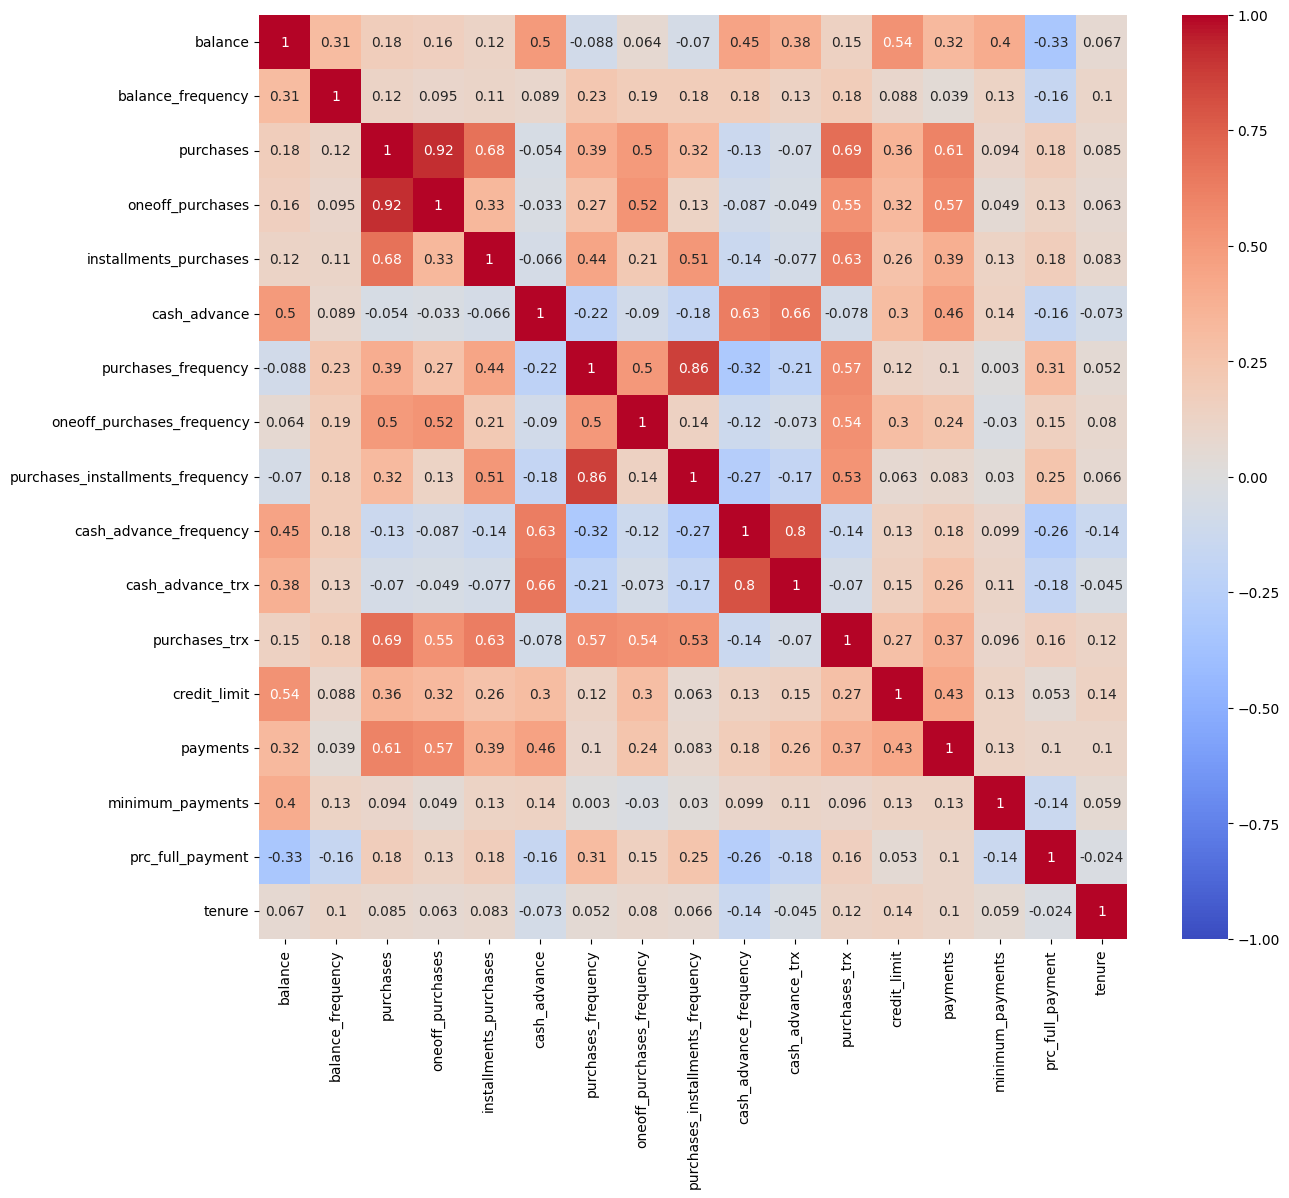

In [171]:
# Correlation Matrix to see potential correlations with each other

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin =-1, vmax =1, cmap='coolwarm')
plt.show()

It seems multiple varaibles are moderately to highly correlated with each other. Dimensionality reduction or PCA may be effective in reducing complexity and redundance within our dataset.

Things to explore about the dataset.

We can observe correlation between:

Purchases
- One-Off purchases (Almost perfectly correlated)
    - May be due to multiple cardholders only making one purchase throughout the entire 6 months
- Installments_Purchases
    - There may be cardholders who's only made one purchase and it is also an installment purchase as well
- Purchase Installments Frequency
- PurchaseTrx


Frequency Variables
- Find out how many purchases allow the classification of a cardholder having a frequency score of 1
- Anything involving both # of transactions/ frequency of transactions and the actual frequency value are highly correlated with each other

Purchase Frequency
- Purchasetrx and purchase frequency is highly correlated

In [172]:
df['balance'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: balance, dtype: float64

In [173]:
df[df['minimum_payments'] > 35000]

balance  balance_frequency  purchases  oneoff_purchases  \
567    3457.086184                1.0    2448.60               0.0   
4376  10571.411070                1.0    7739.48               0.0   
4462   4976.028578                1.0     900.87               0.0   
5657   4628.109931                1.0     912.54               0.0   
5830   8038.893195                1.0       0.00               0.0   
5968   6022.224462                1.0       0.00               0.0   
7132   9024.812044                1.0       0.00               0.0   

      installments_purchases  cash_advance  purchases_frequency  \
567                  2448.60      0.000000                  1.0   
4376                 7739.48      0.000000                  1.0   
4462                  900.87      0.000000                  1.0   
5657                  912.54      0.000000                  1.0   
5830                    0.00    197.915586                  0.0   
5968                    0.00   4111.465632                  0.0   
7132                    0.00   2750.442399                  0.0   

      oneoff_purchases_frequency  purchases_installments_frequency  \
567                          0.0                               1.0   
4376                         0.0                               1.0   
4462                         0.0                               1.0   
5657                         0.0                               1.0   
5830                         0.0                               0.0   
5968                         0.0                               0.0   
7132                         0.0                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
567                 0.000000                 0             12        1700.0   
4376                0.000000                 0             44        8000.0   
4462                0.000000                 0            162        5500.0   
5657                0.000000                 0             21        5000.0   
5830                0.166667                 8              0        9000.0   
5968                0.166667                 6              0        7000.0   
7132                0.083333                 2              0        9000.0   

         payments  minimum_payments  prc_full_payment  tenure  
567    227.514473       38512.12477               0.0      12  
4376  2688.447014       76406.20752               0.0      12  
4462    92.865469       50260.75947               0.0      12  
5657  3746.305759       56370.04117               0.0      12  
5830  3569.182969       43132.72823               0.0      12  
5968  4560.775720       42629.55117               0.0      12  
7132   302.484224       61031.61860               0.0      12

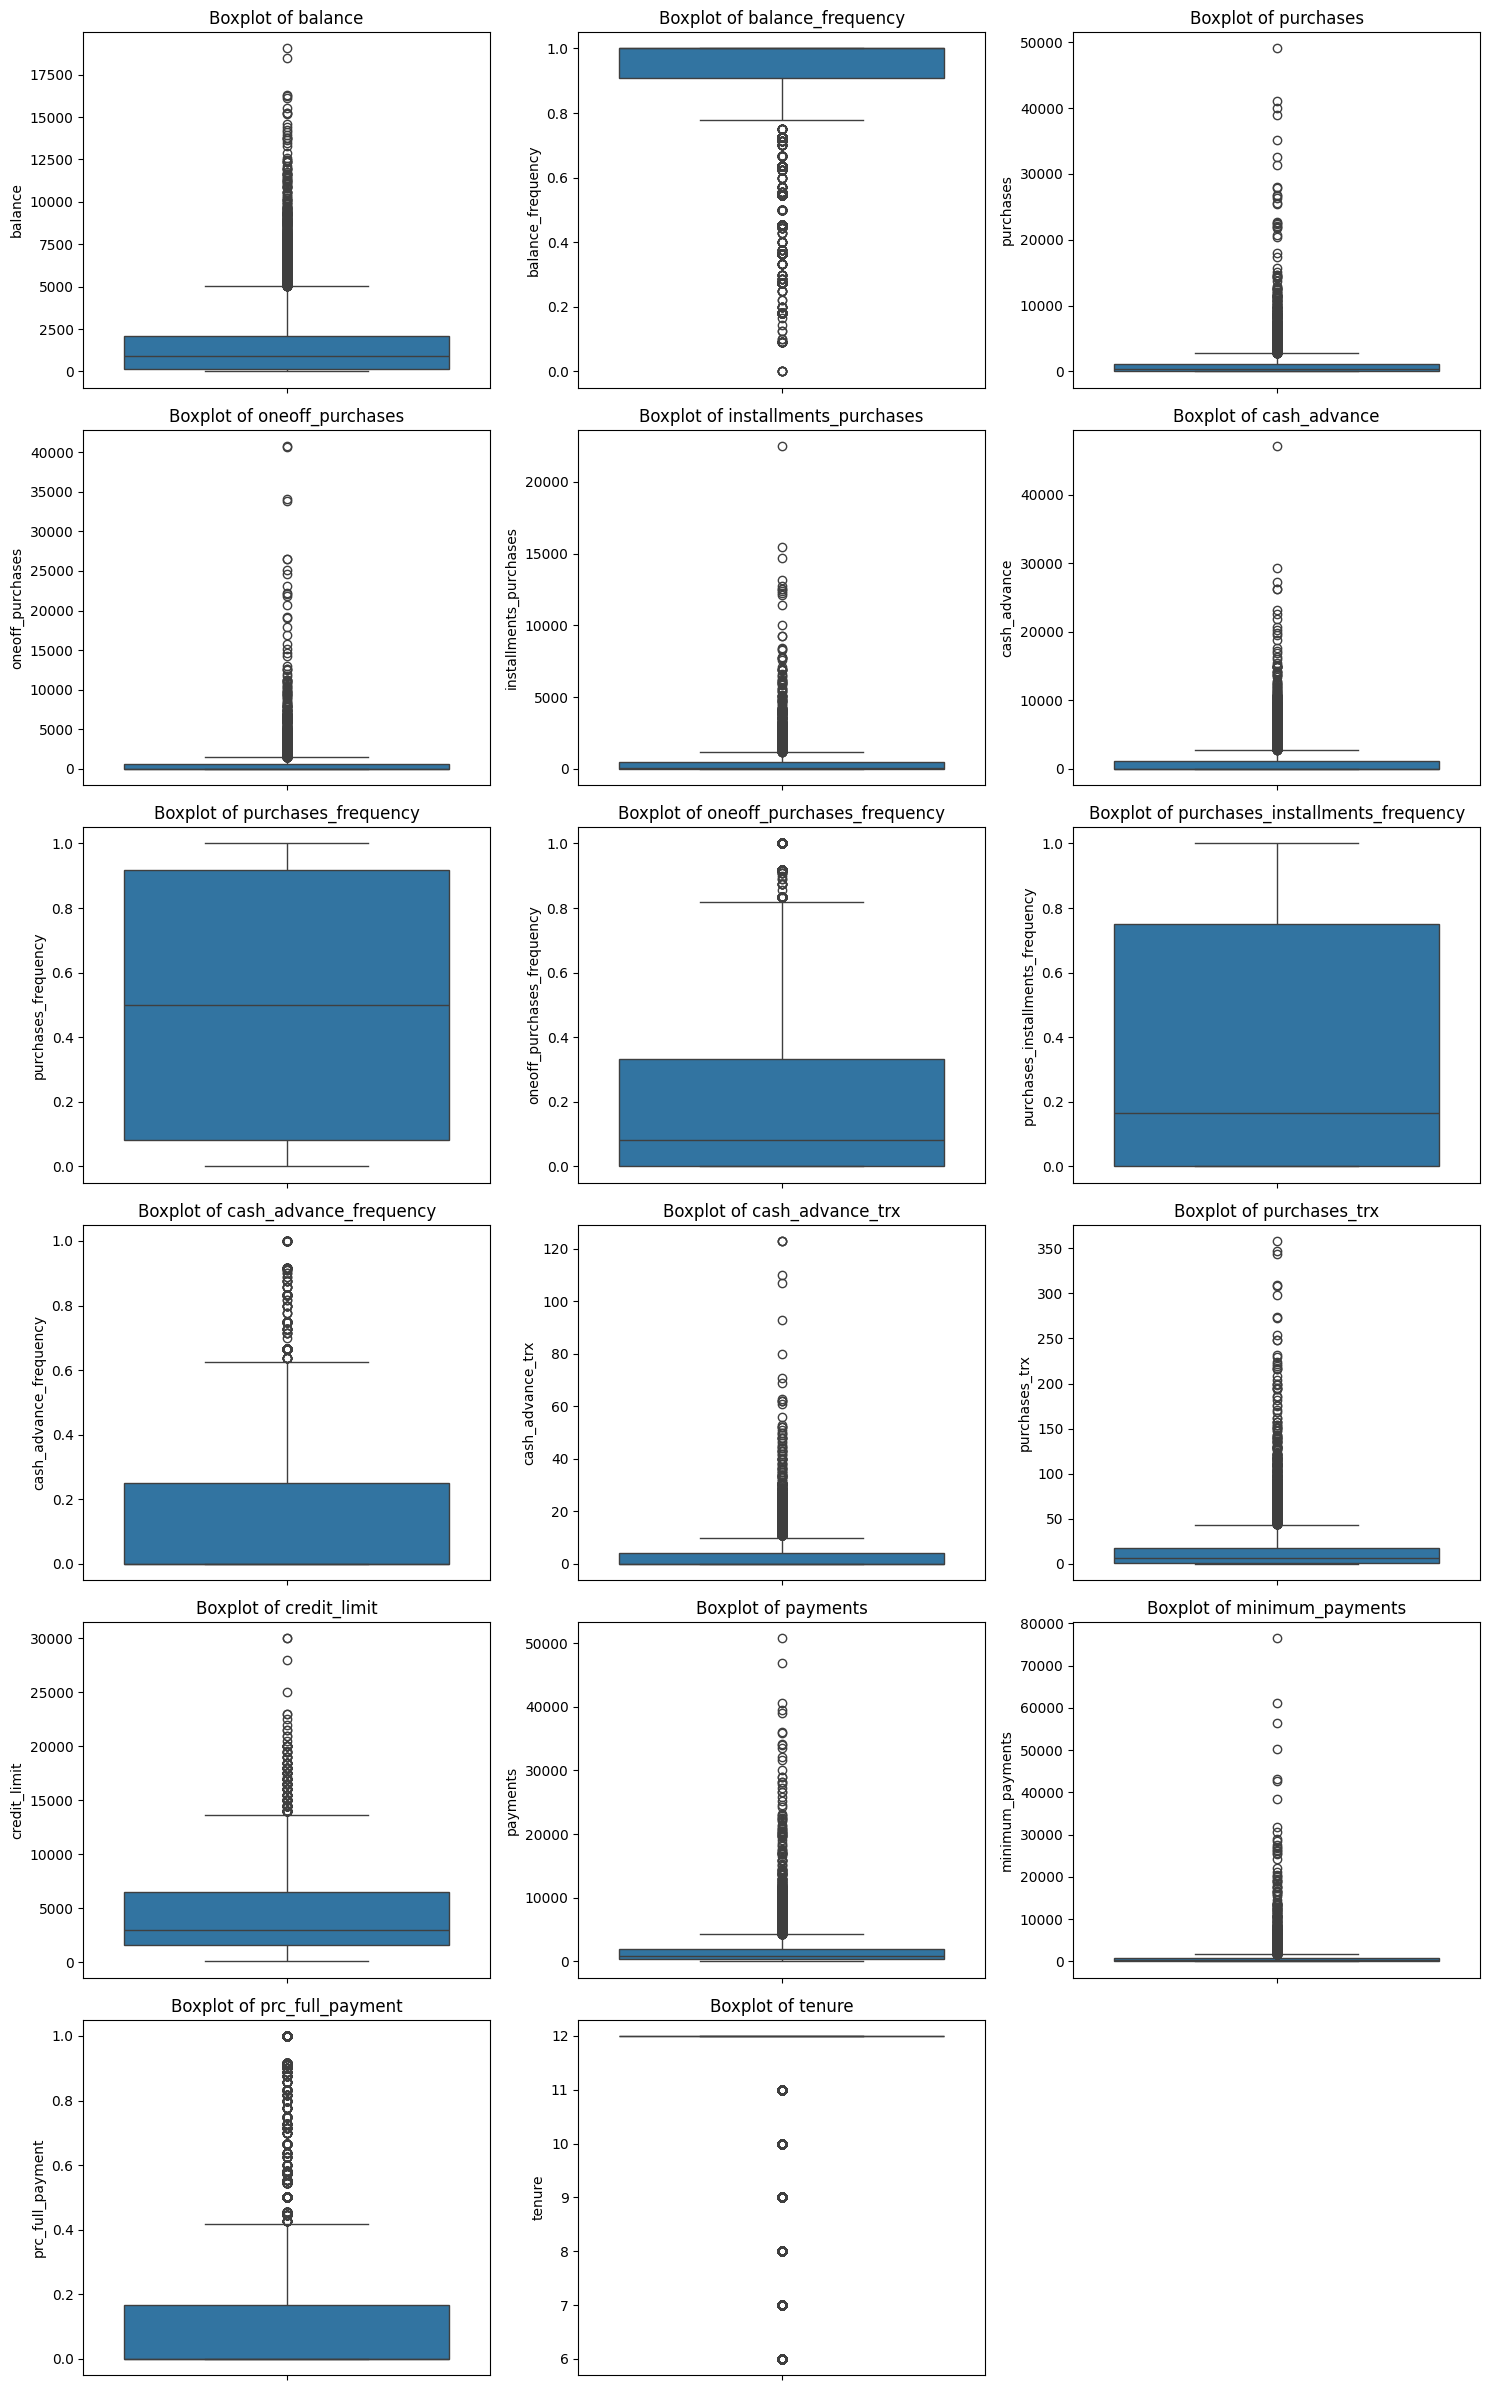

In [174]:
# Determine the number of features and set up the plot grid
num_features = len(df.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a boxplot for each feature
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Winsorization

In [175]:
# Create a copy of the original DataFrame to keep all columns
df_winsorized = df.copy()

# Apply winsorization (clipping) to specific columns
df_winsorized['purchases'] = np.clip(df['purchases'], None, 10000)
df_winsorized['balance'] = np.clip(df['balance'], None, 15000)
df_winsorized['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df_winsorized['payments'] = np.clip(df['payments'], None, 30000)
df_winsorized['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)
df_winsorized['installments_purchases'] = np.clip(df['installments_purchases'], None, 14500)
df_winsorized['credit_limit'] = np.clip(df['credit_limit'], None, 25000)
df_winsorized['oneoff_purchases'] = np.clip(df['oneoff_purchases'], None, 30000)

# Remove rows with null values
df_winsorized = df_winsorized.dropna()

# Verify the changes by displaying a few rows
print(f"Shape after removing null rows: {df_winsorized.shape}")
df_winsorized.head()

Shape after removing null rows: (8636, 17)


balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

Dropping Features to reduce high dimensionality issues

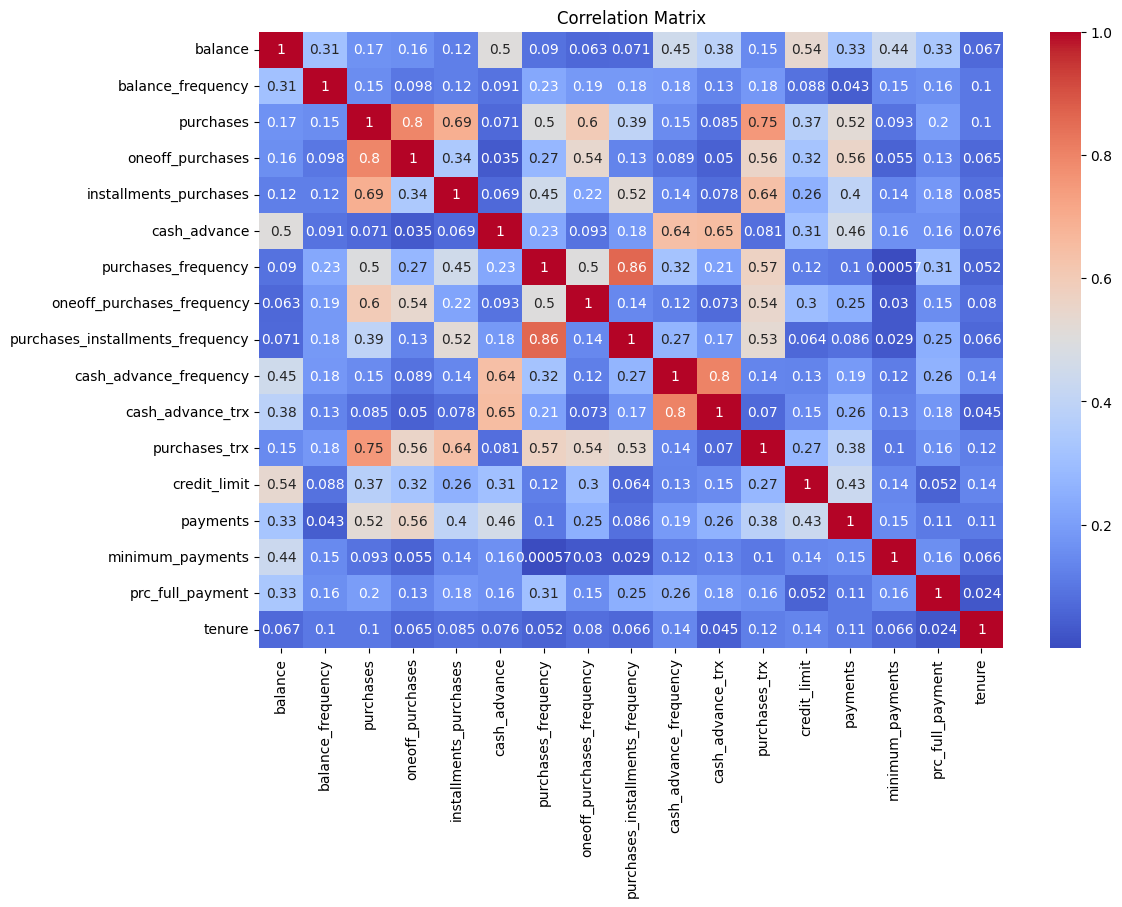

                              level_0                           level_1  \
82                purchases_frequency  purchases_installments_frequency   
108            cash_advance_frequency                  cash_advance_trx   
31                          purchases                  oneoff_purchases   
39                          purchases                     purchases_trx   
32                          purchases            installments_purchases   
..                                ...                               ...   
46                   oneoff_purchases                      cash_advance   
97         oneoff_purchases_frequency                  minimum_payments   
105  purchases_installments_frequency                  minimum_payments   
135                  prc_full_payment                            tenure   
88                purchases_frequency                  minimum_payments   

     correlation  
82      0.862338  
108     0.801260  
31      0.796890  
39      0.751884  
32  

In [176]:
# Calculate the correlation matrix
corr_matrix = df_winsorized.corr().abs()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Extract the upper triangle of the correlation matrix without the diagonal
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Create a list of correlation pairs sorted by absolute correlation, from highest to lowest
sorted_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
    .sort_values(by='correlation', ascending=False)
)

print(sorted_corr_pairs)

In [177]:
# Drop the specified columns from the dataset
df_winsorized = df_winsorized.drop(['purchases_installments_frequency', 'cash_advance_trx', 'oneoff_purchases',
                                    'purchases_trx', 'tenure'], axis=1)

# Verify the changes by displaying the new shape and a few rows
print(f"Shape after dropping columns: {df_winsorized.shape}")
df_winsorized.head()

Shape after dropping columns: (8636, 12)


balance  balance_frequency  purchases  installments_purchases  \
0    40.900749           0.818182      95.40                   95.40   
1  3202.467416           0.909091       0.00                    0.00   
2  2495.148862           1.000000     773.17                    0.00   
4   817.714335           1.000000      16.00                    0.00   
5  1809.828751           1.000000    1333.28                 1333.28   

   cash_advance  purchases_frequency  oneoff_purchases_frequency  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   cash_advance_frequency  credit_limit     payments  minimum_payments  \
0                    0.00        1000.0   201.802084        139.509787   
1                    0.25        7000.0  4103.032597       1072.340217   
2                    0.00        7500.0   622.066742        627.284787   
4                    0.00        1200.0   678.334763        244.791237   
5                    0.00        1800.0  1400.057770       2407.246035   

   prc_full_payment  
0          0.000000  
1          0.222222  
2          0.000000  
4          0.000000  
5          0.000000

---

## Part 2 - Exploratory Data Analysis

Looking to discover the types of outliers and potential credit card customer behaviours we can segment


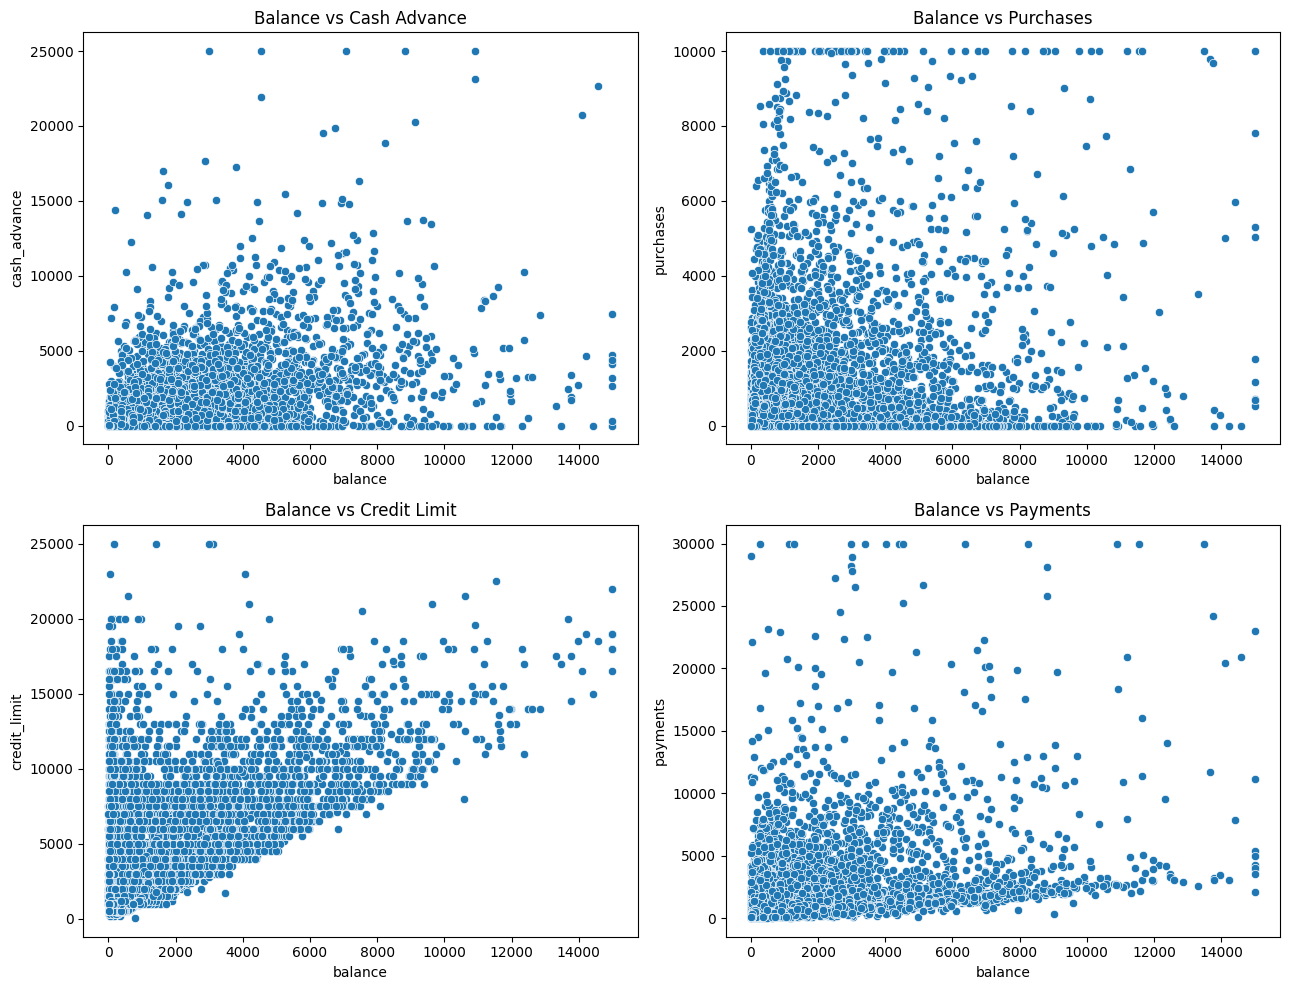

In [178]:
# Checking the relationship between balance and other variables - Outliers have been winsorized
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['cash_advance'], ax=axes[0])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['purchases'], ax=axes[1])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['credit_limit'], ax=axes[2])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['payments'], ax=axes[3])

# Titles for each subplot
axes[0].set_title("Balance vs Cash Advance")
axes[1].set_title("Balance vs Purchases")
axes[2].set_title("Balance vs Credit Limit")
axes[3].set_title("Balance vs Payments")

plt.tight_layout()
plt.show()

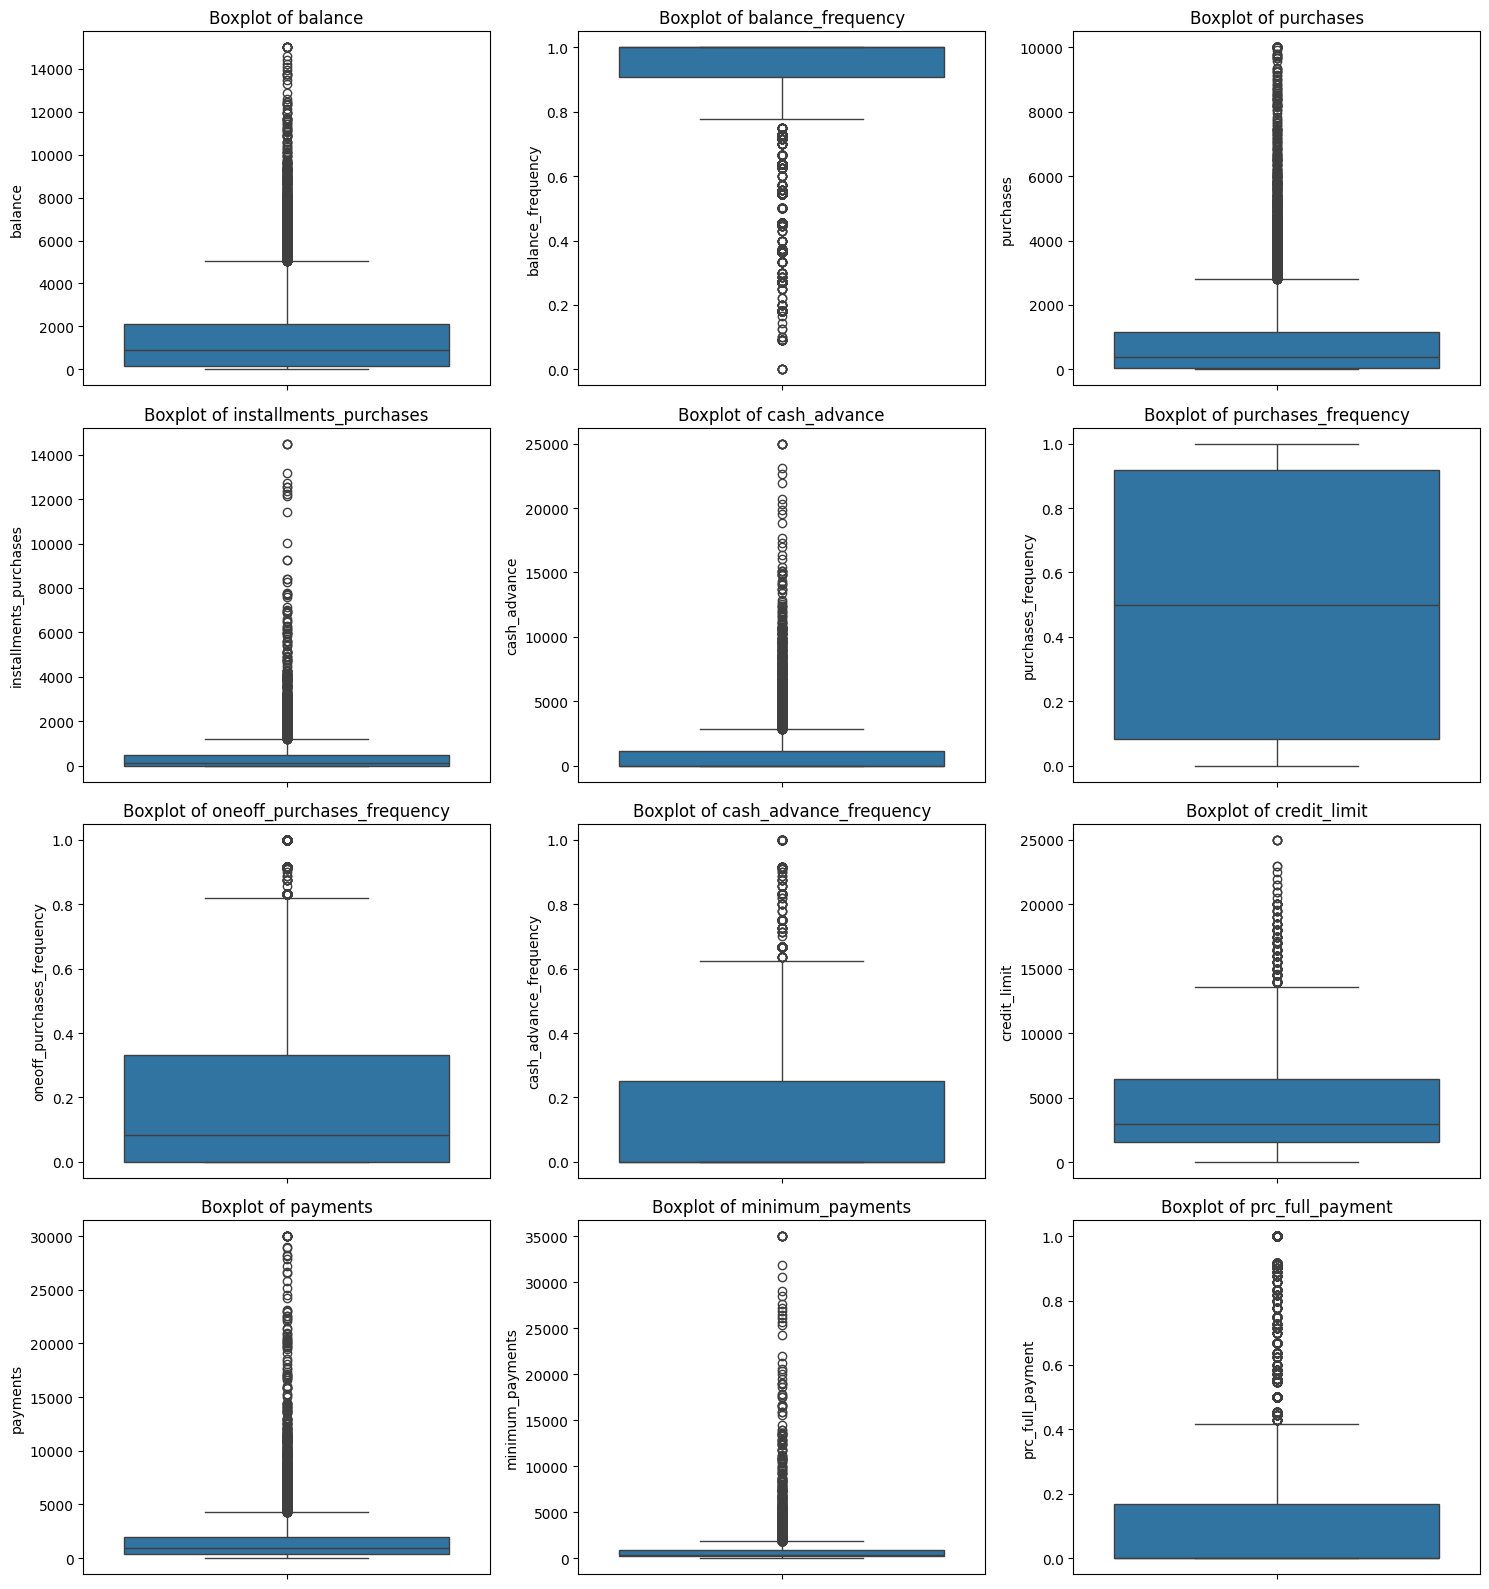

In [179]:
# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a boxplot for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.boxplot(data=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

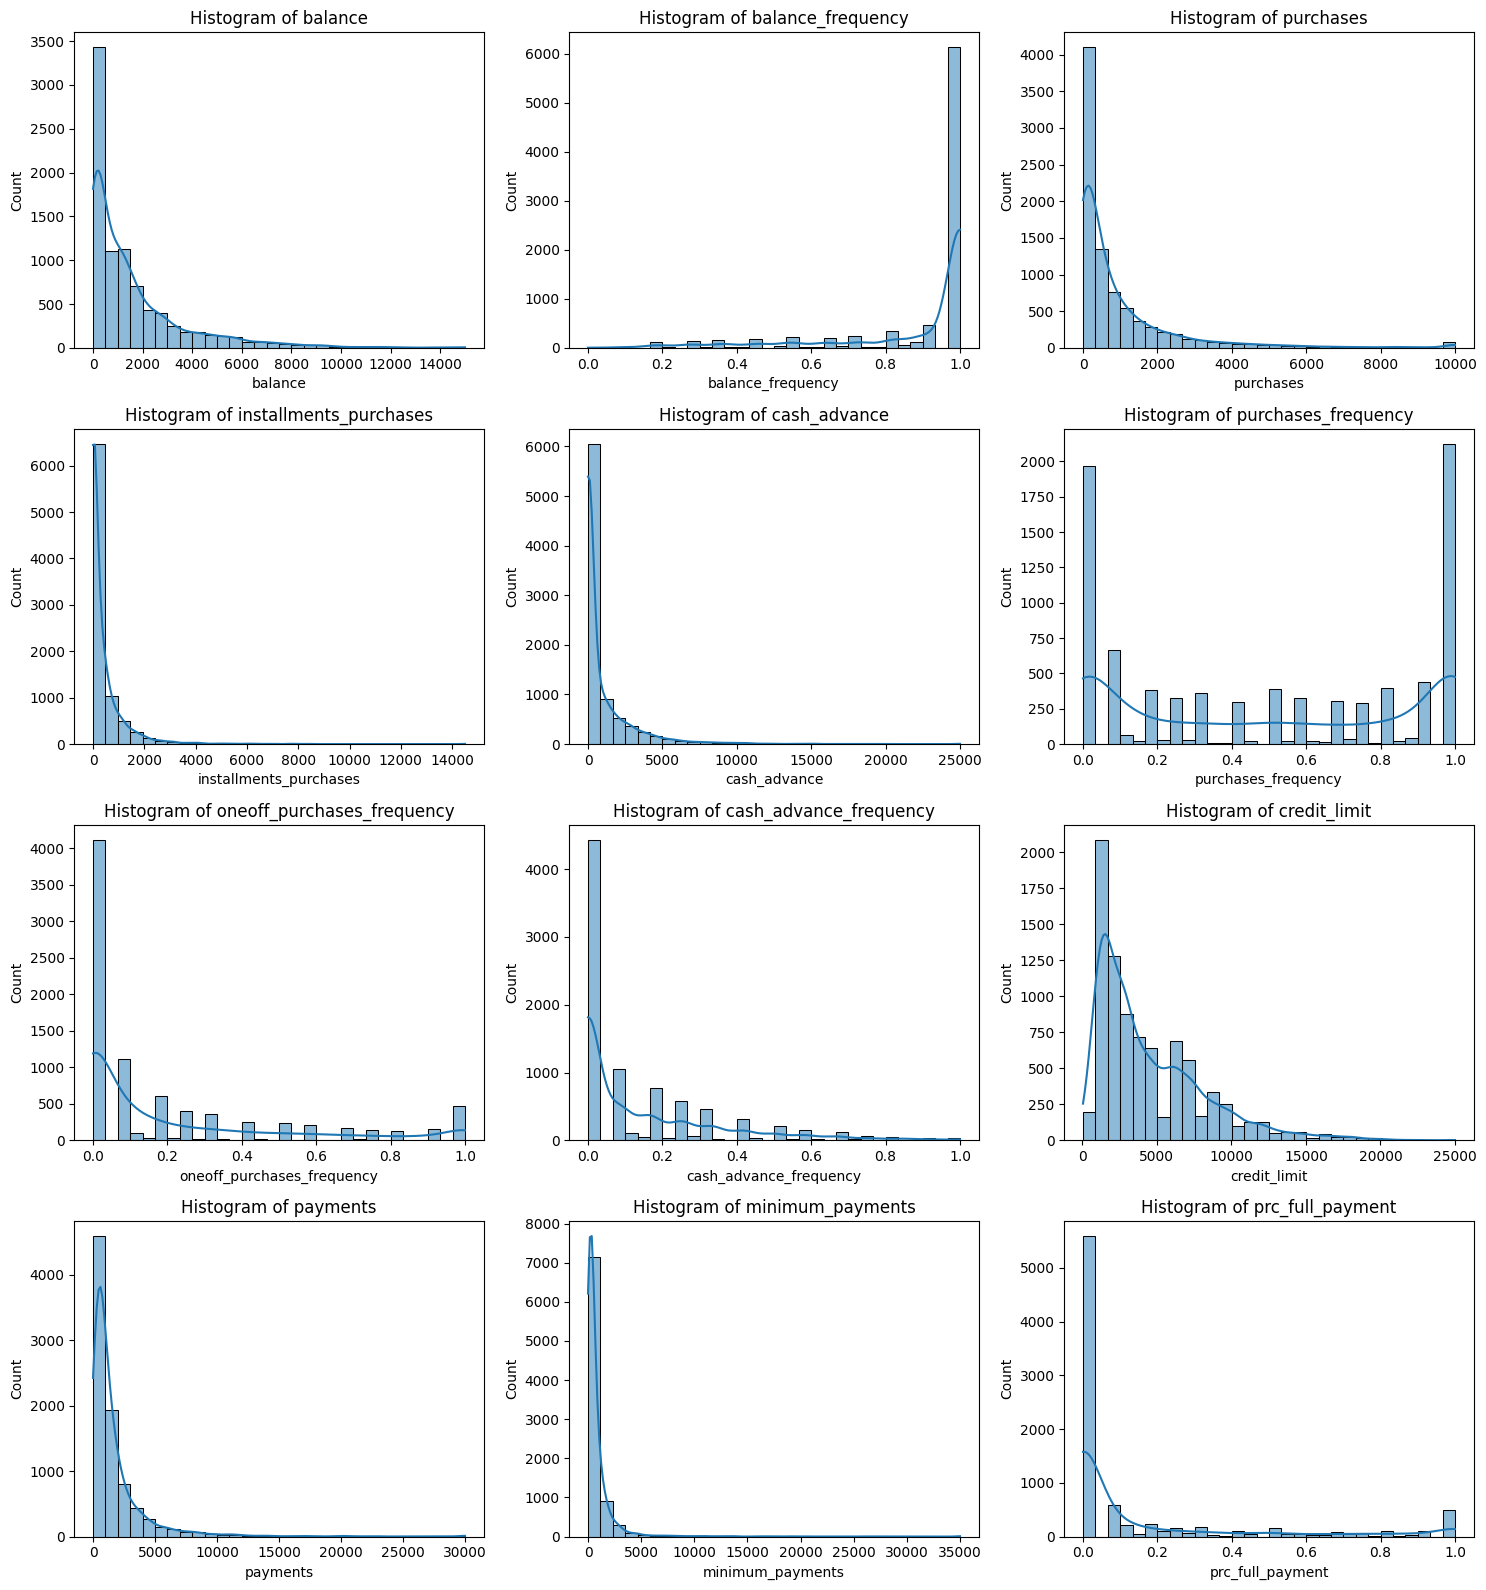

In [180]:
# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.histplot(df_winsorized[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---

## PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

Scalers

In [181]:
minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(df_winsorized)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(df_winsorized)

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_winsorized)

---

K-MEANS: OPTIMIZATION

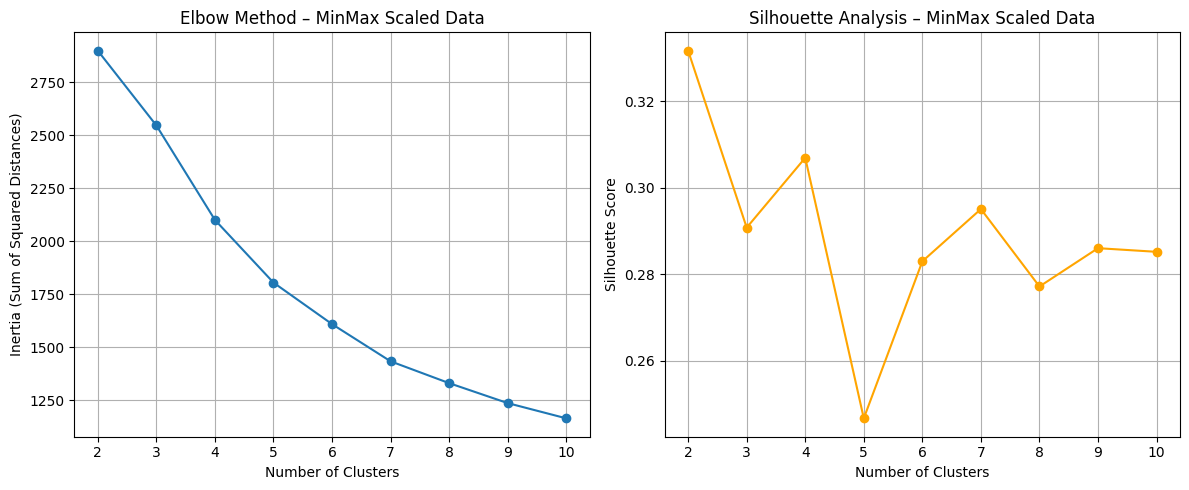

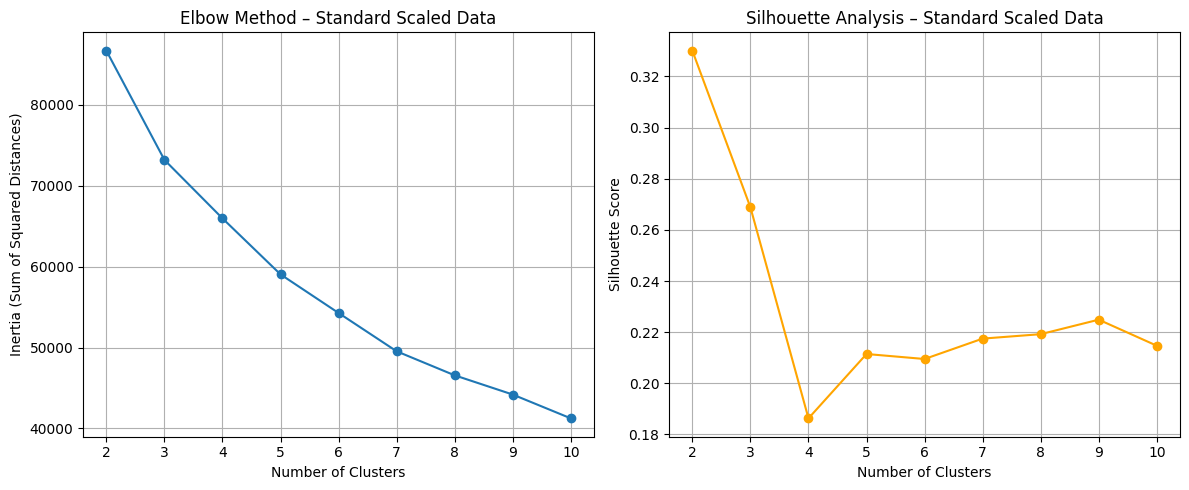

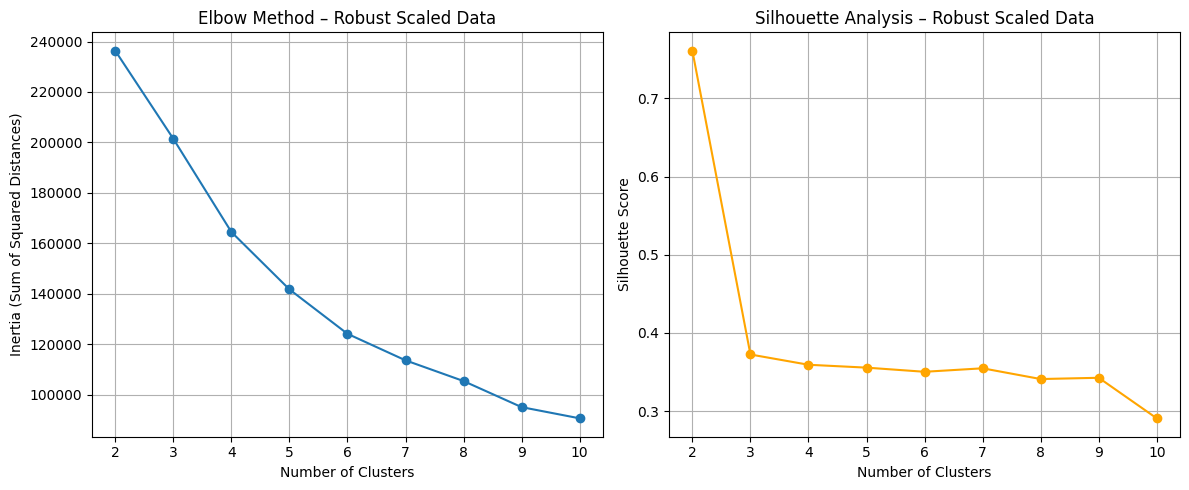

In [182]:
# Define a function to run the Elbow Method and Silhouette Analysis for a given dataset
def elbow_silhouette_analysis(scaled_data, title):
    # Range of clusters to evaluate
    range_n_clusters = range(2, 11)

    # Lists to store the results
    inertia = []  # For Elbow Method
    silhouette_scores = []  # For Silhouette Analysis

    # Loop over the range of cluster numbers
    for n_clusters in range_n_clusters:
        # Initialize KMeans model
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)

        # Elbow method: store inertia
        inertia.append(kmeans.inertia_)

        # Silhouette analysis: calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title(f"Elbow Method – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)

    # Plot Silhouette Analysis
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
    plt.title(f"Silhouette Analysis – {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)

    # Adjust Layout and display plots
    plt.tight_layout()
    plt.show()

# Run the analysis for each scaled dataset
elbow_silhouette_analysis(minmax_df, "MinMax Scaled Data")
elbow_silhouette_analysis(standard_df, "Standard Scaled Data")
elbow_silhouette_analysis(robust_df, "Robust Scaled Data")

K-MEANS MODEL
- note that only the robust data was used to visualize as it the highest silhouette score.
- The robust data was visualized using the number of clusters where the elbow bends the sharpest (5) and where the silhouette score is highest (2)

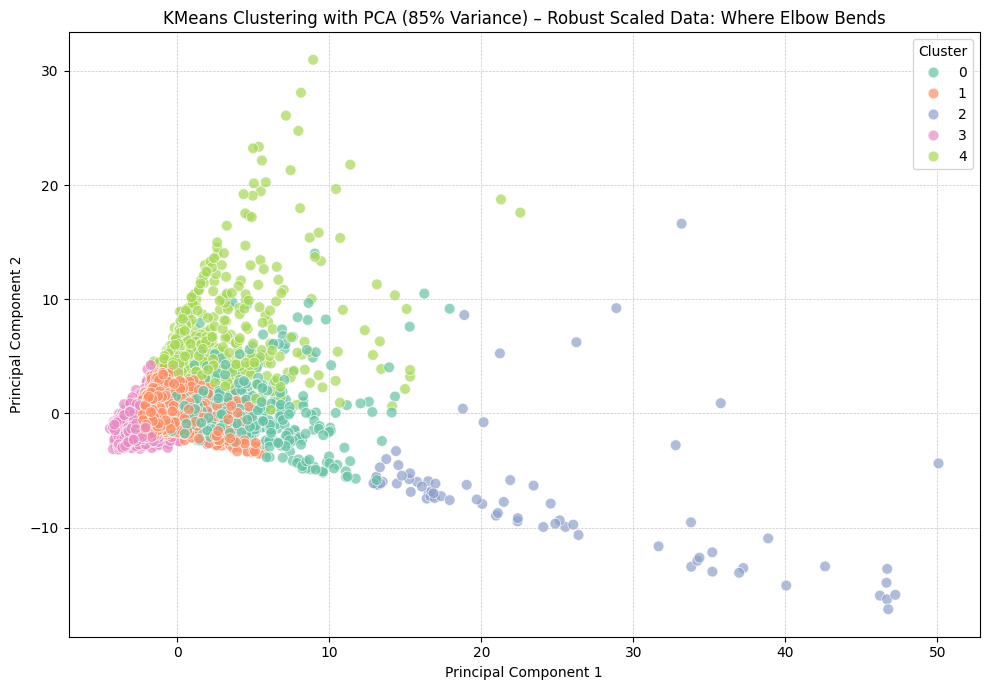

Silhouette Score: 0.42


In [183]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Where Elbow Bends")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

# Example usage:
kmeans_with_pca_visualization_robust(robust_df, n_clusters=5) 

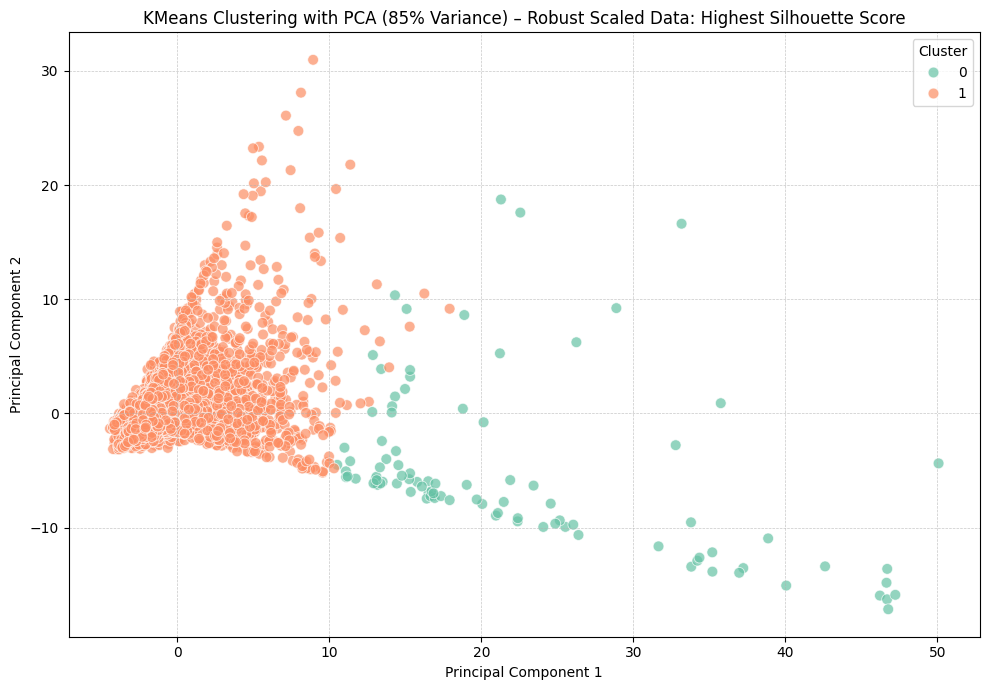

Silhouette Score: 0.78


In [184]:
def kmeans_with_pca_visualization_robust(robust_df, n_clusters):
    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, svd_solver='full')
    robust_pca_data = pca.fit_transform(robust_df)
    
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    robust_labels = kmeans.fit_predict(robust_pca_data)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    
    # Create a DataFrame for visualization using the first two principal components
    robust_df_with_clusters = pd.DataFrame(robust_pca_data[:, :2], columns=["PC1", "PC2"])
    robust_df_with_clusters['Cluster'] = robust_labels
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=robust_df_with_clusters, palette="Set2", s=60, alpha=0.7)
    plt.title("KMeans Clustering with PCA (85% Variance) – Robust Scaled Data: Highest Silhouette Score")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the silhouette score as a separate output
    print(f"Silhouette Score: {silhouette_avg:.2f}")

# Example usage:
kmeans_with_pca_visualization_robust(robust_df, n_clusters=2) 

The K-Means scored reasonably high when there was 2 clusters but there is not enough separation between them to articulate a strongly supported business recommendation.

---

DBSCAN OPTIMIZATION

In [185]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def optimize_dbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for eps and min_samples
    eps_values = np.arange(0.5, 3.0, 0.5)
    min_samples_values = range(3, 10)
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_eps = None
    best_min_samples = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_eps_for_dataset = None
        best_min_samples_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of eps and min_samples
        for eps in eps_values:
            early_break = False  # Flag for early termination of inner loop
            
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(scaled_data)
                
                # Count the number of clusters (excluding noise)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                
                # Skip configurations with fewer than two clusters
                if n_clusters < 2:
                    early_break = True
                    break  # Skip further min_samples for this eps value
                
                # Calculate silhouette score for valid configurations
                score = silhouette_score(scaled_data, labels)
                
                # Update the best score for the current dataset
                if score > best_score_for_dataset:
                    best_eps_for_dataset = eps
                    best_min_samples_for_dataset = min_samples
                    best_score_for_dataset = score
            
            if early_break:
                break  # Exit the loop for the current `eps` as increasing `min_samples` further will likely reduce clusters

        # Print the best configuration for this dataset
        print(f"{title} - Best eps: {best_eps_for_dataset}, Best min_samples: {best_min_samples_for_dataset}, "
              f"Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_eps = best_eps_for_dataset
            best_min_samples = best_min_samples_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = scaled_data

    # Return the best configuration across all datasets
    return best_scaled_data, best_eps, best_min_samples, best_score, best_title

# Use the function to process all three datasets at once
best_data, best_eps, best_min_samples, best_score, best_title = optimize_dbscan_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, Eps: {best_eps}, Min Samples: {best_min_samples}, Silhouette Score: {best_score}")

MinMax Data - Best eps: 0.5, Best min_samples: 3, Silhouette Score: 0.4365814282083193
Standard Data - Best eps: 1.0, Best min_samples: 6, Silhouette Score: 0.14801081907092903
Robust Data - Best eps: 1.5, Best min_samples: 6, Silhouette Score: 0.38991503437129593

Best configuration across all datasets:
Dataset: MinMax Data, Eps: 0.5, Min Samples: 3, Silhouette Score: 0.4365814282083193


DBSCAN MODEL
- note that only the robust scaled data will be modeled as it performed the best

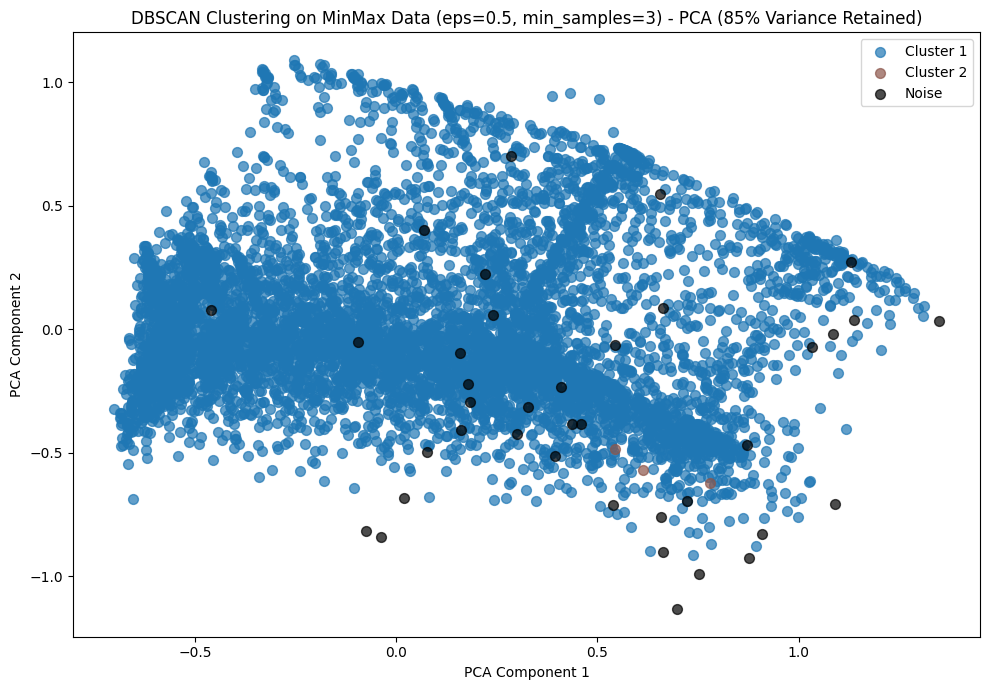

Silhouette Score: 0.4365814282083193
Number of Clusters: 2
Number of Noise Points: 38


In [186]:
def visualize_best_dbscan_clusters_optimized_pca(best_data, best_eps, best_min_samples, title):
    # Perform DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels = dbscan.fit_predict(best_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use distinct colors for clusters and set noise to black
    colors = plt.cm.get_cmap("tab20", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            # Black color for noise points
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    # Title with dataset name and best parameters
    plt.title(f"DBSCAN Clustering on {title} (eps={best_eps}, min_samples={best_min_samples}) - PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters, n_noise

# Call the function using the best configuration from optimize_dbscan_all
silhouette_score, num_clusters, num_noise_points = visualize_best_dbscan_clusters_optimized_pca(best_data, best_eps, best_min_samples, best_title)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_score}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

---

HDBSCAN Optimization

* note that the ranges for min_cluster and min_samples were much longer before but this was reduced when the most optimal sizes and values were found for each to make the optimization run more quickly on subsequent re-tests.

In [187]:
import hdbscan
from sklearn.metrics import silhouette_score

def optimize_hdbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for min_cluster_size and min_samples
    min_cluster_sizes = range(5, 15)
    min_samples_values = range(1, 7)
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_min_cluster_size = None
    best_min_samples = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_min_cluster_size_for_dataset = None
        best_min_samples_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of min_cluster_size and min_samples
        for min_cluster_size in min_cluster_sizes:
            for min_samples in min_samples_values:
                # Create HDBSCAN clusterer
                clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
                labels = clusterer.fit_predict(scaled_data)
                
                # Count the number of clusters (excluding noise)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                
                # Skip configurations with fewer than two clusters
                if n_clusters < 2:
                    continue
                
                # Calculate the silhouette score for valid configurations
                score = silhouette_score(scaled_data, labels)
                
                # Update the best score for the current dataset
                if score > best_score_for_dataset:
                    best_min_cluster_size_for_dataset = min_cluster_size
                    best_min_samples_for_dataset = min_samples
                    best_score_for_dataset = score
                
                # If we encounter very low clusters with high min_samples, break inner loop
                if n_clusters <= 2:
                    break  # Skip further min_samples for this min_cluster_size as it’s unlikely to improve
        
        # Print the best configuration for this dataset
        print(f"{title} - Best min_cluster_size: {best_min_cluster_size_for_dataset}, "
              f"Best min_samples: {best_min_samples_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_min_cluster_size = best_min_cluster_size_for_dataset
            best_min_samples = best_min_samples_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = scaled_data

    # Return the best configuration across all datasets
    return best_scaled_data, best_min_cluster_size, best_min_samples, best_score, best_title

# Use the function to process all three datasets at once
best_data, best_min_cluster_size, best_min_samples, best_score, best_title = optimize_hdbscan_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, Min Cluster Size: {best_min_cluster_size}, Min Samples: {best_min_samples}, Silhouette Score: {best_score}")
   

MinMax Data - Best min_cluster_size: 5, Best min_samples: 1, Silhouette Score: -0.2962062068748716
Standard Data - Best min_cluster_size: 7, Best min_samples: 3, Silhouette Score: 0.6031907147659643
Robust Data - Best min_cluster_size: 13, Best min_samples: 1, Silhouette Score: 0.7631672645590395

Best configuration across all datasets:
Dataset: Robust Data, Min Cluster Size: 13, Min Samples: 1, Silhouette Score: 0.7631672645590395


HDBSCAN Model

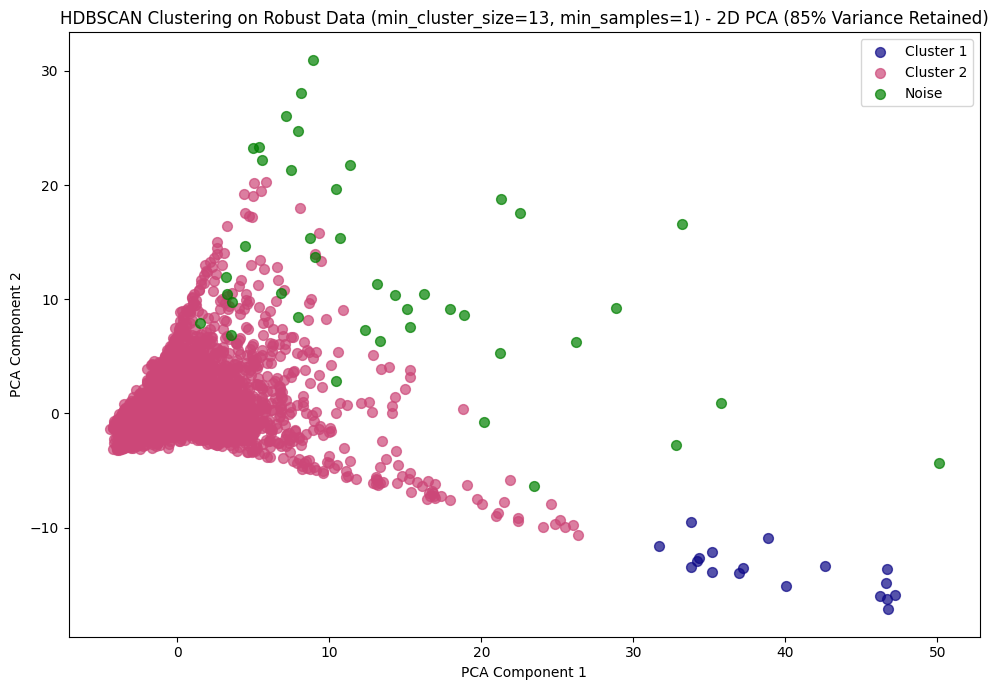

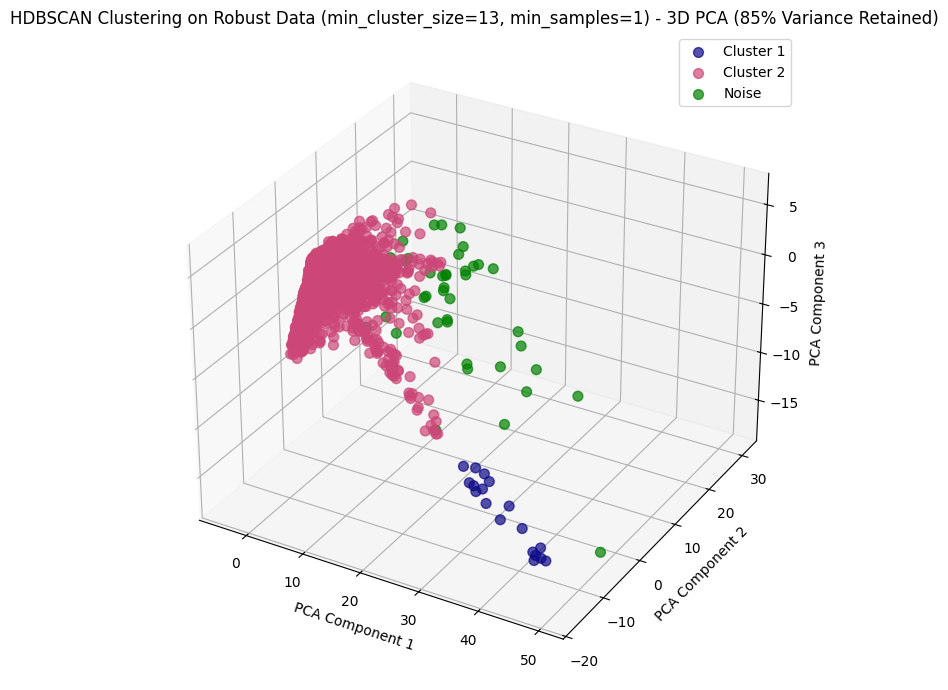

Silhouette Score: 0.7631672645590395
Number of Clusters: 2
Number of Noise Points: 42
Noise Points Characteristics:
    Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       -1    2.90689   -1.09762   6.423034  11.683571   4.566004   0.373117   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0   1.058227   0.867965    2.24344   12.114238   10.360373    1.706103   

   Cluster Size  
0            42  
Cluster Characteristics:
    Cluster  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
1        0   2.160622   0.000000   0.262161   1.021149   0.813692  -0.007576   
2        1   0.332621  -1.157317   0.506875   0.616607   0.856810  -0.006645   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
1  -0.138888   0.277778   0.485828    0.234097   45.180635    0.000000   
2   0.365409   0.548715   0.300488    0.516362    0.679214    0.954152   

   Cluster Size  
1            18  
2          

In [188]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to visualize the best HDBSCAN clusters with optimized PCA
def visualize_best_hdbscan_clusters_optimized_pca(best_data, best_min_cluster_size, best_min_samples, title):
    # Perform HDBSCAN with the best parameters
    clusterer = hdbscan.HDBSCAN(min_cluster_size=best_min_cluster_size, min_samples=best_min_samples)
    labels = clusterer.fit_predict(best_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_data)
    
    # Determine if 2D or 3D visualization is possible
    if pca_data.shape[1] >= 3:
        # Use 3 components for 3D visualization if possible
        pca_3d_data = pca_data[:, :3]
        pca_2d_data = pca_data[:, :2]
    else:
        # If only 2 components, use for both visualizations
        pca_2d_data = pca_data
        pca_3d_data = None  # Not enough dimensions for 3D
    
    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use the 'plasma' colormap, which does not have brown
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "green"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_2d_data[labels == label, 0], 
            pca_2d_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"HDBSCAN Clustering on {title} (min_cluster_size={best_min_cluster_size}, "
              f"min_samples={best_min_samples}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "green"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"HDBSCAN Clustering on {title} (min_cluster_size={best_min_cluster_size}, "
                     f"min_samples={best_min_samples}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs, including the labels
    return silhouette_avg, n_clusters, n_noise, labels

# Function to characterize clusters based on the clustering labels
def characterize_clusters(data, labels):
    # Convert to DataFrame if necessary
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])
    
    # Add the labels as a new column
    data['Cluster'] = labels
    
    # Group by cluster and calculate mean for each feature
    cluster_characteristics = data.groupby('Cluster').mean()
    
    # Count the number of points in each cluster
    cluster_sizes = data['Cluster'].value_counts().sort_index()
    
    # Add the size of each cluster as a new column
    cluster_characteristics['Cluster Size'] = cluster_sizes

    # Reset index for better readability
    cluster_characteristics.reset_index(inplace=True)
    
    # Separate noise points if they exist
    if -1 in cluster_characteristics['Cluster'].values:
        noise_characteristics = cluster_characteristics[cluster_characteristics['Cluster'] == -1]
        cluster_characteristics = cluster_characteristics[cluster_characteristics['Cluster'] != -1]
        print("Noise Points Characteristics:\n", noise_characteristics)
    
    # Display the characteristics
    print("Cluster Characteristics:\n", cluster_characteristics)
    return cluster_characteristics

silhouette_avg, num_clusters, num_noise_points, labels = visualize_best_hdbscan_clusters_optimized_pca(
    best_data, best_min_cluster_size, best_min_samples, best_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")


---

Mean Shift Model Optimization

* note that the ranges for bandwidth were longer before but this was reduced when the most optimal bandwidth was found for each scaled dataframe to make the optimization run more quickly on subsequent re-tests.

In [189]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

def optimize_mean_shift_all(minmax_df, standard_df, robust_df):
    # Define range for bandwidths
    bandwidth_values = np.arange(1, 2.75, 1)
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_bandwidth = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_bandwidth_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over bandwidth values
        for bandwidth in bandwidth_values:
            ms = MeanShift(bandwidth=bandwidth)
            labels = ms.fit_predict(scaled_data)
            
            # Count the number of clusters (excluding noise)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # Skip configurations with fewer than two clusters
            if n_clusters < 2:
                break  # If a larger bandwidth produces few clusters, break early to save time
            
            # Calculate silhouette score for valid configurations
            score = silhouette_score(scaled_data, labels)
            
            # Update the best score for the current dataset
            if score > best_score_for_dataset:
                best_bandwidth_for_dataset = bandwidth
                best_score_for_dataset = score
        
        # Print the best configuration for this dataset
        print(f"{title} - Best bandwidth: {best_bandwidth_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_bandwidth = best_bandwidth_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = scaled_data

    # Return the best configuration across all datasets
    return best_scaled_data, best_bandwidth, best_score, best_title

# Use the function to process all three datasets at once
best_data, best_bandwidth, best_score, best_title = optimize_mean_shift_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, Bandwidth: {best_bandwidth}, Silhouette Score: {best_score}")

MinMax Data - Best bandwidth: 1.0, Silhouette Score: 0.4732590278409589
Standard Data - Best bandwidth: 2.0, Silhouette Score: 0.09408899276857453
Robust Data - Best bandwidth: 2.0, Silhouette Score: 0.12096164953451054

Best configuration across all datasets:
Dataset: MinMax Data, Bandwidth: 1.0, Silhouette Score: 0.4732590278409589


Mean Shift Model

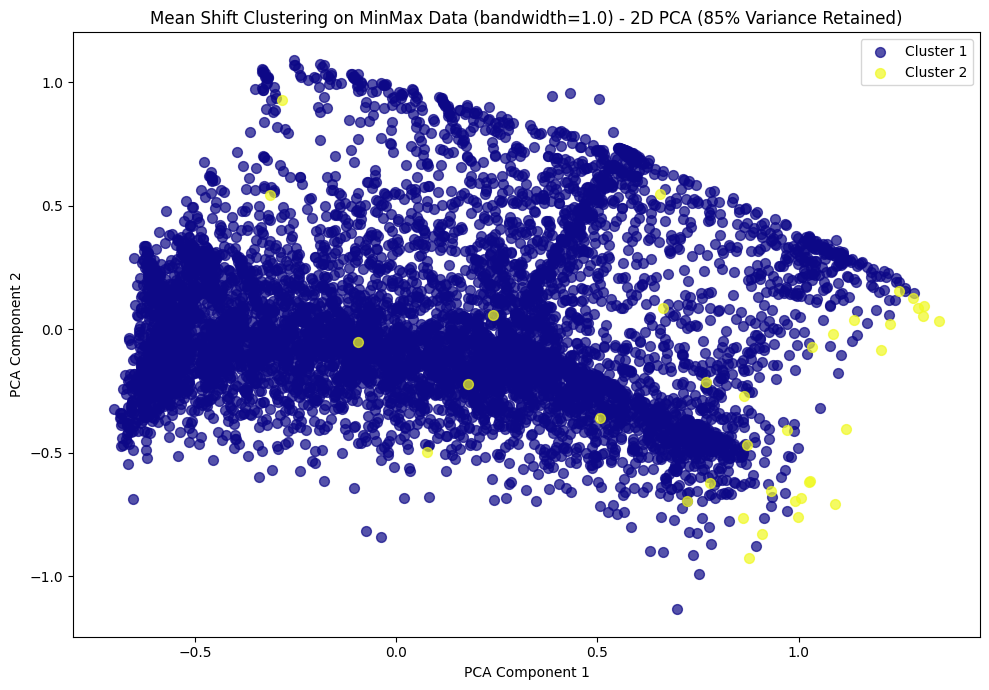

Silhouette Score: 0.4732590278409589
Number of Clusters: 2
Number of Noise Points: 0


In [190]:
def visualize_best_mean_shift_clusters_optimized_pca(best_data, best_bandwidth, title):
    # Perform Mean Shift with the best bandwidth
    ms = MeanShift(bandwidth=best_bandwidth)
    labels = ms.fit_predict(best_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use a color map without brown tones
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"Mean Shift Clustering on {title} (bandwidth={best_bandwidth}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters, n_noise

# Call the function using the best configuration from optimize_mean_shift_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_mean_shift_clusters_optimized_pca(
    best_data, best_bandwidth, best_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

---

Expectation Maximization Model Optimization

In [191]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_gmm_all(minmax_df, standard_df, robust_df):
    # Define ranges for number of components and covariance types
    n_components_values = range(2, 5) 
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_n_components = None
    best_covariance_type = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_n_components_for_dataset = None
        best_covariance_type_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of n_components and covariance_type
        for n_components in n_components_values:
            early_termination = False  # Flag for early termination
            
            for covariance_type in covariance_types:
                gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
                
                # Fit the model and get labels
                labels = gmm.fit_predict(scaled_data)
                
                # Count the number of unique clusters
                n_clusters = len(set(labels))
                
                # Skip configurations with fewer than two clusters
                if n_clusters < 2:
                    early_termination = True
                    break  # Skip further covariance types for this n_components
                
                # Calculate silhouette score for valid configurations
                score = silhouette_score(scaled_data, labels)
                
                # Update the best score for the current dataset
                if score > best_score_for_dataset:
                    best_n_components_for_dataset = n_components
                    best_covariance_type_for_dataset = covariance_type
                    best_score_for_dataset = score
            
            if early_termination:
                break  # Exit the loop for current `n_components` as increasing it will likely reduce the cluster count
        
        # Print the best configuration for this dataset
        print(f"{title} - Best n_components: {best_n_components_for_dataset}, "
              f"Covariance Type: {best_covariance_type_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_n_components = best_n_components_for_dataset
            best_covariance_type = best_covariance_type_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = scaled_data

    # Return the best configuration across all datasets
    return best_scaled_data, best_n_components, best_covariance_type, best_score, best_title

# Use the function to process all three datasets at once
best_data, best_n_components, best_covariance_type, best_score, best_title = optimize_gmm_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, N Components: {best_n_components}, Covariance Type: {best_covariance_type}, Silhouette Score: {best_score}")

MinMax Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.32368702984917325
Standard Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.39136271343023044
Robust Data - Best n_components: 2, Covariance Type: tied, Silhouette Score: 0.7757232997208984

Best configuration across all datasets:
Dataset: Robust Data, N Components: 2, Covariance Type: tied, Silhouette Score: 0.7757232997208984


Expectation Maximization Model

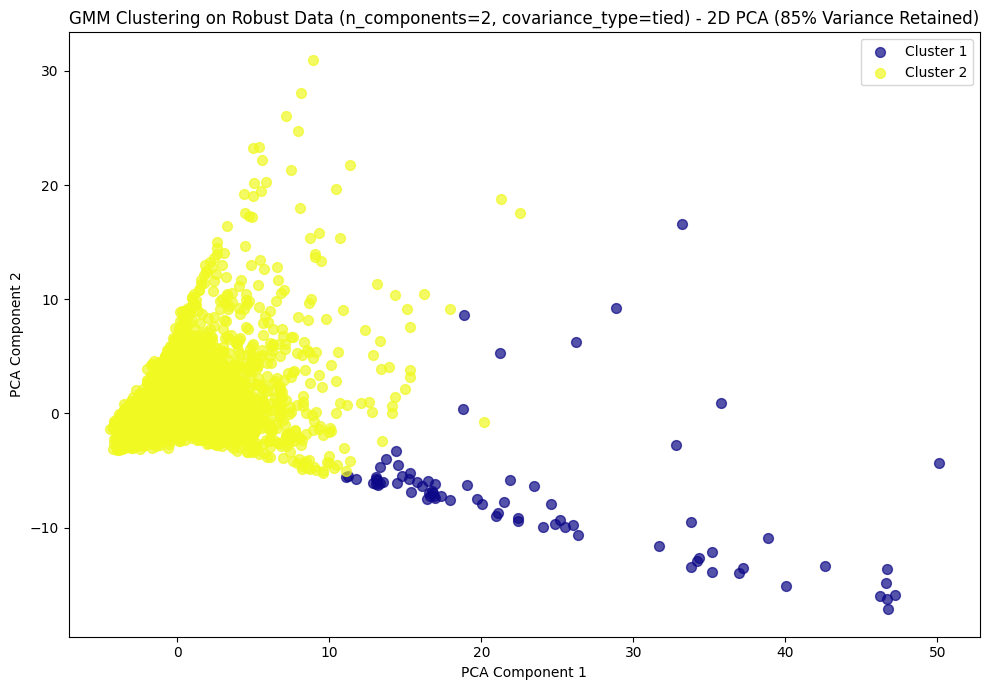

Silhouette Score: 0.7757232997208984
Number of Clusters: 2
Number of Noise Points: 0


In [192]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

def visualize_best_gmm_clusters_optimized_pca(best_data, best_n_components, best_covariance_type, title):
    # Perform GMM with the best parameters
    gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type, random_state=42)
    labels = gmm.fit_predict(best_data)
    
    # Calculate additional metrics
    n_clusters = len(set(labels))
    n_noise = list(labels).count(-1)  # For GMM, there usually isn’t noise, but including this for consistency
    if n_clusters > 1:
        silhouette_avg = silhouette_score(best_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if pca_data.shape[1] > 2:
        pca_data = pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    
    # Use a color map without brown tones
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"GMM Clustering on {title} (n_components={best_n_components}, covariance_type={best_covariance_type}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters, n_noise

# Call the function using the best configuration from optimize_gmm_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_gmm_clusters_optimized_pca(
    best_data, best_n_components, best_covariance_type, best_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

---

Agglomerative Clustering Model Optimization

MinMax Data - Best n_clusters: 2, Linkage: average, Silhouette Score: 0.4673764952668877
Standard Data - Best n_clusters: 2, Linkage: single, Silhouette Score: 0.7527858781347929
Robust Data - Best n_clusters: 2, Linkage: complete, Silhouette Score: 0.8565353976490289

Visualizing the dendrogram for the best dataset: Robust Data


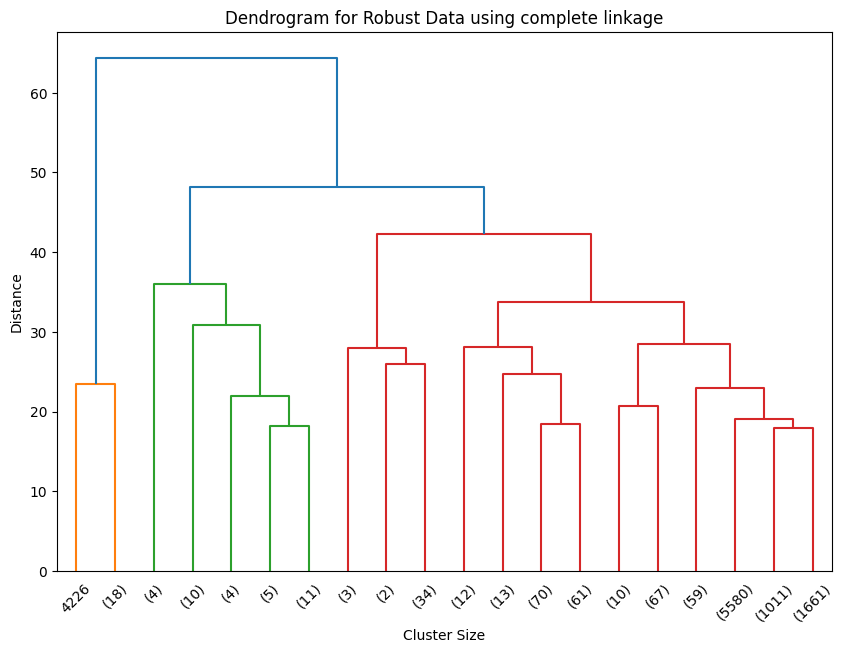


Best configuration across all datasets:
Dataset: Robust Data, N Clusters: 2, Linkage: complete, Silhouette Score: 0.8565353976490289


In [200]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(data, method, title):
    # Generate the linkage matrix
    linked = linkage(data, method=method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
    plt.title(f"Dendrogram for {title} using {method} linkage")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")
    plt.show()

def optimize_agglomerative_all(minmax_df, standard_df, robust_df):
    # Define ranges for number of clusters and linkage types
    n_clusters_values = range(2, 10)  # Adjust range as needed
    linkage_methods = ['ward', 'complete', 'average', 'single']
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_n_clusters = None
    best_linkage = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_n_clusters_for_dataset = None
        best_linkage_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of n_clusters and linkage
        for n_clusters in n_clusters_values:
            for linkage_method in linkage_methods:
                # Ward linkage requires Euclidean distance; skip non-Euclidean linkages
                if linkage_method == 'ward' and scaled_data.shape[1] != 2:
                    continue
                
                agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
                labels = agglomerative.fit_predict(scaled_data)
                
                # Only consider configurations that produce more than 1 valid cluster
                n_clusters_found = len(set(labels))
                if n_clusters_found > 1:
                    score = silhouette_score(scaled_data, labels)
                    if score > best_score_for_dataset:
                        best_n_clusters_for_dataset = n_clusters
                        best_linkage_for_dataset = linkage_method
                        best_score_for_dataset = score
        
        # Print the best configuration for this dataset
        print(f"{title} - Best n_clusters: {best_n_clusters_for_dataset}, "
              f"Linkage: {best_linkage_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_n_clusters = best_n_clusters_for_dataset
            best_linkage = best_linkage_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = scaled_data

    # Visualize the dendrogram for the dataset with the highest silhouette score
    if best_scaled_data is not None and best_linkage is not None:
        print(f"\nVisualizing the dendrogram for the best dataset: {best_title}")
        plot_dendrogram(best_scaled_data, best_linkage, best_title)

    # Return the best configuration across all datasets
    return best_scaled_data, best_n_clusters, best_linkage, best_score, best_title

# Use the function to process all three datasets at once
best_data, best_n_clusters, best_linkage, best_score, best_title = optimize_agglomerative_all(minmax_df, standard_df, robust_df)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {best_title}, N Clusters: {best_n_clusters}, Linkage: {best_linkage}, Silhouette Score: {best_score}")

Agglomerative Clustering Model

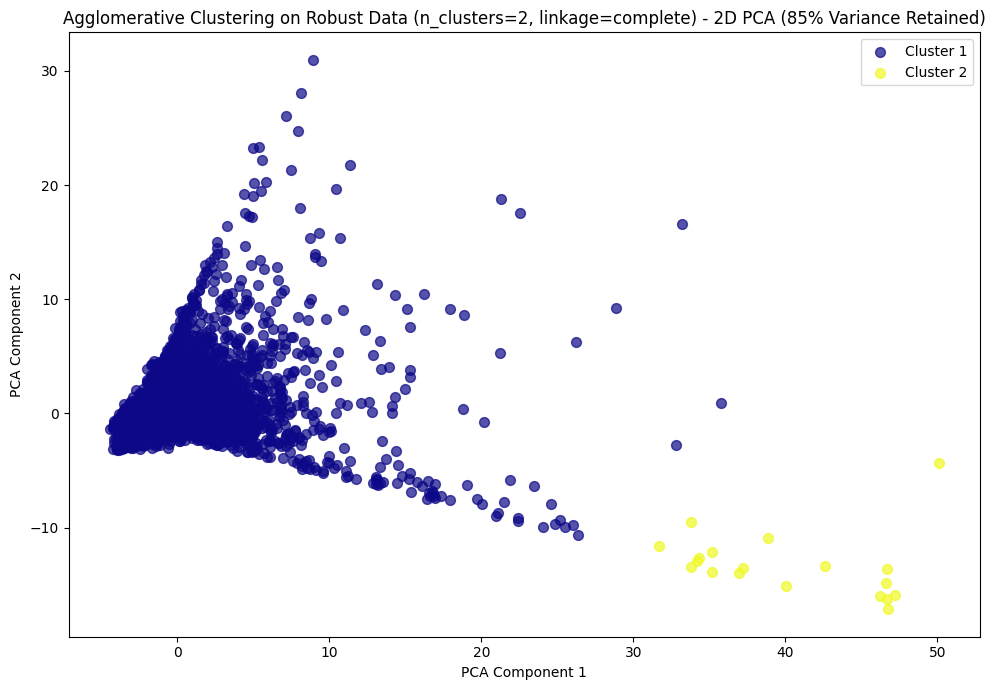

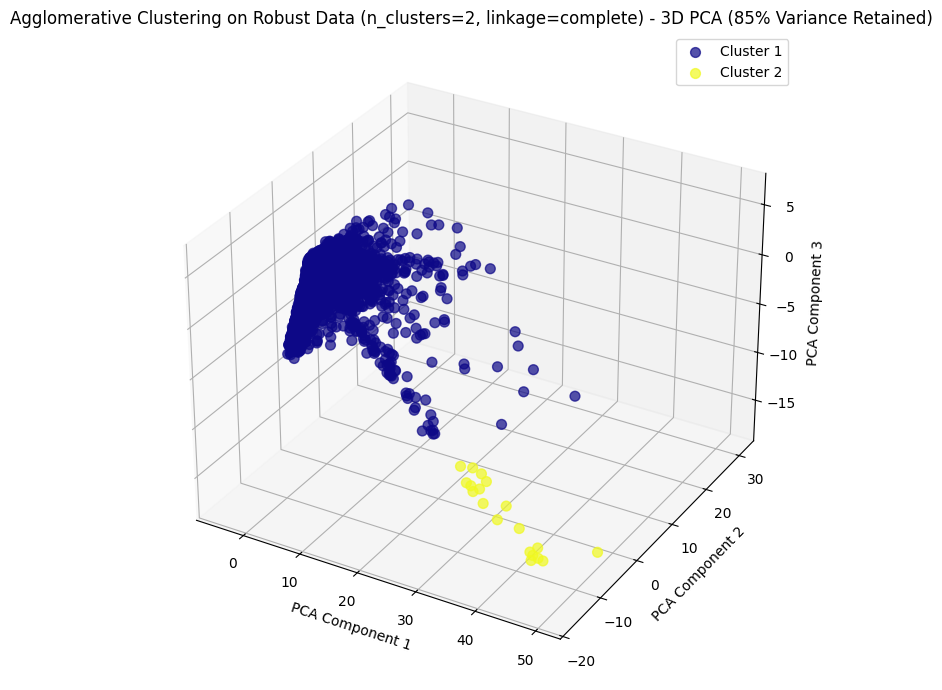

Silhouette Score: 0.8565353976490289
Number of Clusters: 2
Number of Noise Points: 0


In [194]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def visualize_best_agglomerative_clusters_optimized_pca(best_data, best_n_clusters, best_linkage, title):
    # Perform Agglomerative Clustering with the best parameters
    agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
    labels = agglomerative.fit_predict(best_data)
    
    # Calculate additional metrics
    n_clusters_found = len(set(labels))
    n_noise = list(labels).count(-1)  # Agglomerative Clustering usually doesn’t have noise, but added for consistency
    if n_clusters_found > 1:
        silhouette_avg = silhouette_score(best_data, labels)
    else:
        silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    pca = PCA(n_components=0.85)
    pca_data = pca.fit_transform(best_data)
    
    # Check if we have enough dimensions for 3D plotting
    if pca_data.shape[1] >= 3:
        pca_3d_data = pca_data[:, :3]  # First three components for 3D
    else:
        pca_3d_data = None  # Not enough dimensions for 3D
        pca_data = pca_data[:, :2]  # Use first two components for 2D

    # 2D Plot
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("plasma", len(unique_labels))
    for label in unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = colors(label)
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            pca_data[labels == label, 0], 
            pca_data[labels == label, 1], 
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"Agglomerative Clustering on {title} (n_clusters={best_n_clusters}, linkage={best_linkage}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot (if available)
    if pca_3d_data is not None:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        for label in unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = colors(label)
                label_text = f"Cluster {label + 1}"
            
            ax.scatter(
                pca_3d_data[labels == label, 0],
                pca_3d_data[labels == label, 1],
                pca_3d_data[labels == label, 2],
                s=50, c=[color], label=label_text, alpha=0.7
            )
        
        ax.set_title(f"Agglomerative Clustering on {title} (n_clusters={best_n_clusters}, linkage={best_linkage}) - 3D PCA (85% Variance Retained)")
        ax.set_xlabel("PCA Component 1")
        ax.set_ylabel("PCA Component 2")
        ax.set_zlabel("PCA Component 3")
        ax.legend()
        plt.tight_layout()
        plt.show()

    # Return the metrics as separate outputs
    return silhouette_avg, n_clusters_found, n_noise

# Call the function using the best configuration from optimize_agglomerative_all
silhouette_avg, num_clusters, num_noise_points = visualize_best_agglomerative_clusters_optimized_pca(
    best_data, best_n_clusters, best_linkage, best_title
)

# Display the metrics separately
print(f"Silhouette Score: {silhouette_avg}")
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points: {num_noise_points}")

---

Affinity Propagation Model Optimization

In [195]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to randomly sample data from either a DataFrame or NumPy array
def random_sample_data(data, frac=0.2, random_state=42):
    np.random.seed(random_state)
    if isinstance(data, pd.DataFrame):
        # If the input is a DataFrame, use the sample method
        return data.sample(frac=frac, random_state=random_state)
    elif isinstance(data, np.ndarray):
        # If the input is a NumPy array, use np.random.choice
        n_samples = int(len(data) * frac)
        sampled_indices = np.random.choice(data.shape[0], size=n_samples, replace=False)
        return data[sampled_indices, :]
    else:
        raise ValueError("Input data should be either a DataFrame or a NumPy array.")

# Function to build and evaluate Affinity Propagation model with sampling and limited iterations
def build_affinity_propagation_model_with_sampling(data, damping_value, title, frac=0.2):
    sampled_data = random_sample_data(data, frac=frac, random_state=42)
    
    # Initialize and fit the Affinity Propagation model with limited iterations
    affinity = AffinityPropagation(damping=damping_value, max_iter=200, convergence_iter=15, random_state=42)
    cluster_labels = affinity.fit_predict(sampled_data)
    
    # Add the cluster labels to the sampled DataFrame
    if isinstance(sampled_data, np.ndarray):
        df_with_clusters = pd.DataFrame(sampled_data, columns=[f"Feature_{i+1}" for i in range(sampled_data.shape[1])])
    else:
        df_with_clusters = sampled_data.copy()
    df_with_clusters['Cluster'] = cluster_labels

    # Calculate silhouette score
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)

    return df_with_clusters, affinity, silhouette_avg

# Function to optimize Affinity Propagation parameters with sampling and limited iterations
def optimize_affinity_propagation_with_sampling(data, damping_range, title, frac=0.2):
    best_damping_value = None
    best_score = -1
    best_model = None
    best_df_with_clusters = None

    for damping_value in damping_range:
        sampled_data = random_sample_data(data, frac=frac, random_state=42)
        affinity = AffinityPropagation(damping=damping_value, max_iter=200, convergence_iter=15, random_state=42)
        cluster_labels = affinity.fit_predict(sampled_data)
        
        if len(np.unique(cluster_labels)) > 1:
            score = silhouette_score(sampled_data, cluster_labels)
            if score > best_score:
                best_score = score
                best_damping_value = damping_value
                best_model = affinity
                if isinstance(sampled_data, np.ndarray):
                    best_df_with_clusters = pd.DataFrame(sampled_data, columns=[f"Feature_{i+1}" for i in range(sampled_data.shape[1])])
                else:
                    best_df_with_clusters = sampled_data.copy()
                best_df_with_clusters['Cluster'] = cluster_labels

    return best_df_with_clusters, best_model, best_score, best_damping_value

# Optimize and store silhouette scores
silhouette_scores = {}

# Example usage on scaled datasets (assuming minmax_df, standard_df, and robust_df are defined)
scaled_datasets = {
    "MinMax Data": minmax_df,
    "Standard Data": standard_df,
    "Robust Data": robust_df
}

damping_range = [0.5, 0.6, 0.7, 0.8, 0.9]

# Store the results
results = {}

for title, data in scaled_datasets.items():
    df_with_clusters, affinity, score, best_damping_value = optimize_affinity_propagation_with_sampling(data, damping_range, title, frac=0.2)
    silhouette_scores[title] = score
    results[title] = (df_with_clusters, affinity, score, best_damping_value)

# Display all silhouette scores
print("\nSilhouette Scores for all datasets:")
for title, (df_with_clusters, affinity, score, best_damping_value) in results.items():
    print(f"{title} - Best damping value: {best_damping_value}, Best Silhouette Score: {score:.15f}")


Silhouette Scores for all datasets:
MinMax Data - Best damping value: 0.7, Best Silhouette Score: 0.203662761098351
Standard Data - Best damping value: 0.7, Best Silhouette Score: 0.165954013741949
Robust Data - Best damping value: 0.9, Best Silhouette Score: 0.188264234043002


Affinity Propagation Model

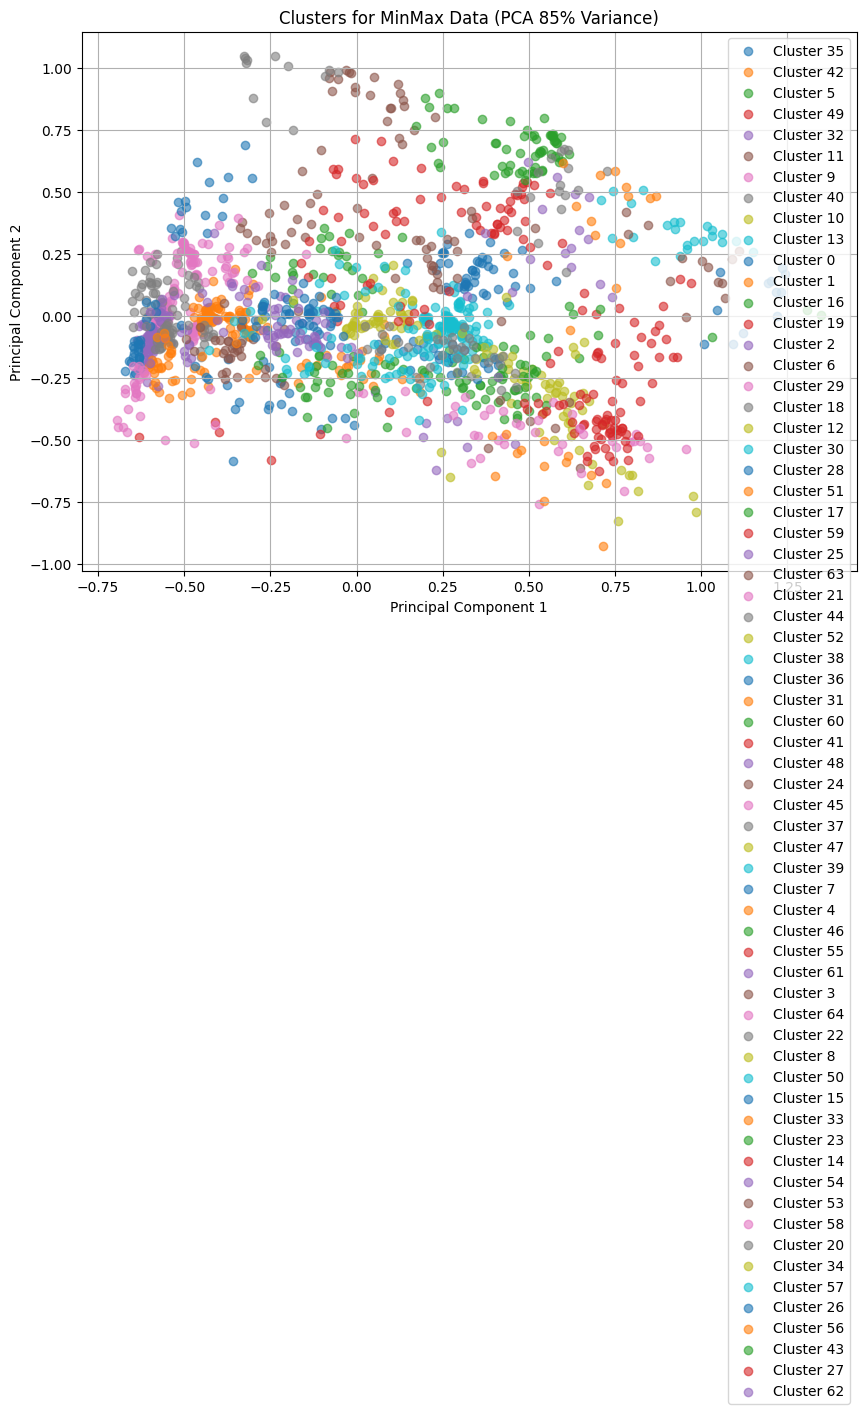

Best Silhouette Score: 0.2037
Number of Clusters: 65


In [196]:
def visualize_best_affinity_propagation_cluster(results):
    # Identify the dataset with the highest silhouette score
    best_title = max(results, key=lambda x: results[x][2])
    best_df_with_clusters, _, best_score, _ = results[best_title]

    # Get the number of clusters
    n_clusters = best_df_with_clusters['Cluster'].nunique()

    # Apply PCA to retain 85% variance
    pca = PCA(n_components=0.85, random_state=42)
    pca_data = pca.fit_transform(best_df_with_clusters.drop(columns=['Cluster']))

    # Create a DataFrame with PCA components and clusters
    pca_df = pd.DataFrame(pca_data, columns=[f"PC_{i+1}" for i in range(pca_data.shape[1])])
    pca_df['Cluster'] = best_df_with_clusters['Cluster'].values

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    for cluster in pca_df['Cluster'].unique():
        cluster_data = pca_df[pca_df['Cluster'] == cluster]
        plt.scatter(cluster_data['PC_1'], cluster_data['PC_2'], label=f'Cluster {cluster}', alpha=0.6)

    # Customize plot
    plt.title(f"Clusters for {best_title} (PCA 85% Variance)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the silhouette score and number of clusters as separate outputs
    return best_score, n_clusters

# Usage
best_silhouette_score, best_n_clusters = visualize_best_affinity_propagation_cluster(results)
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
print(f"Number of Clusters: {best_n_clusters}")

---

## PART 4 - INTERPRETING CLUSTERS

- Characterize the clusters formed: What kind of customers fall into each cluster? 
    What features are most significant in distinguishing between clusters?

In [197]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Step 1: Scaling and Clustering with Agglomerative Clustering
scaler = RobustScaler().fit(df_winsorized)
best_data = scaler.transform(df_winsorized)  # Scaled data for clustering

# Apply Agglomerative Clustering with chosen parameters
n_clusters = 2  # Set the desired number of clusters
linkage = 'complete'  # Set linkage method ('ward', 'complete', 'average', 'single')
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
labels = clusterer.fit_predict(best_data)  # `labels` now contains the cluster assignments

# Step 2: Inverse Transform to Original Scale
best_data_original_scale = scaler.inverse_transform(best_data)

# Step 3: Create a DataFrame with the original feature names and the Agglomerative Clustering labels
feature_names = df_winsorized.columns
best_data_with_clusters = pd.DataFrame(best_data_original_scale, columns=feature_names)
best_data_with_clusters['Cluster'] = labels

# Step 4: Calculate the mean values of each feature for each cluster
cluster_characteristics = best_data_with_clusters.groupby('Cluster').mean()

# Display characteristics for each cluster
for cluster_id in sorted(cluster_characteristics.index):
    cluster_dict = cluster_characteristics.loc[cluster_id].to_dict()
    print(f"\nCluster {cluster_id} Characteristics:")
    for key, value in cluster_dict.items():
        print(f"{key}: {value:.2f}")


Cluster 0 Characteristics:
balance: 1591.34
balance_frequency: 0.89
purchases: 965.30
installments_purchases: 418.58
cash_advance: 990.82
purchases_frequency: 0.50
oneoff_purchases_frequency: 0.21
cash_advance_frequency: 0.14
credit_limit: 4518.39
payments: 1774.56
minimum_payments: 785.24
prc_full_payment: 0.16

Cluster 1 Characteristics:
balance: 5430.99
balance_frequency: 1.00
purchases: 1036.84
installments_purchases: 965.50
cash_advance: 872.92
purchases_frequency: 0.52
oneoff_purchases_frequency: 0.04
cash_advance_frequency: 0.07
credit_limit: 5518.42
payments: 1330.87
minimum_payments: 30230.94
prc_full_payment: 0.00


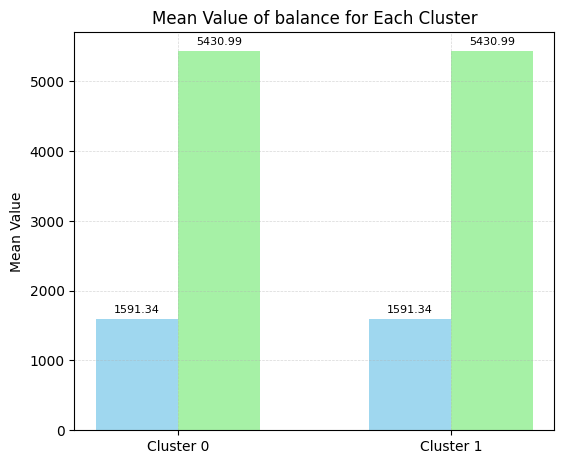

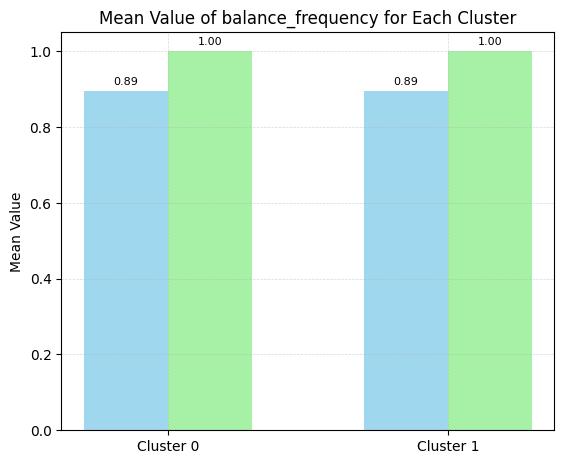

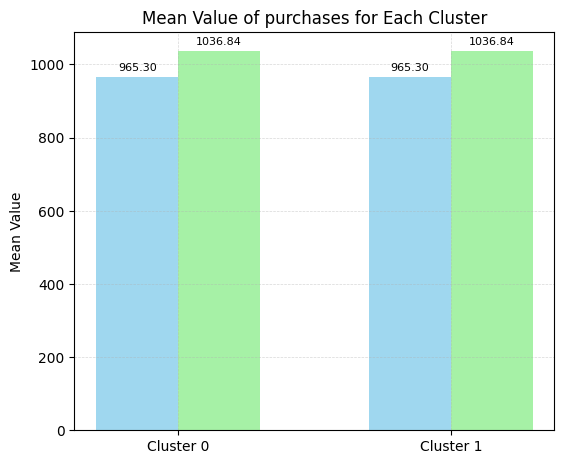

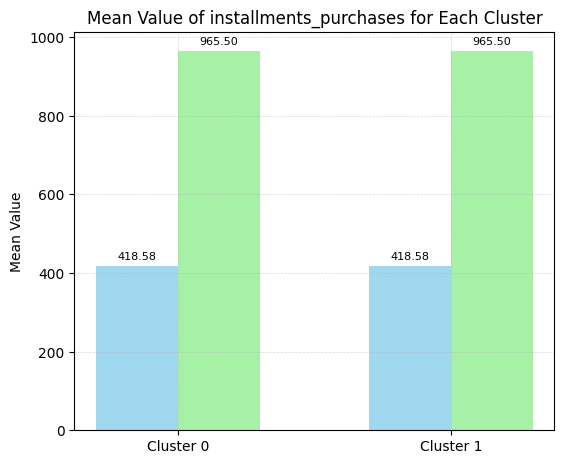

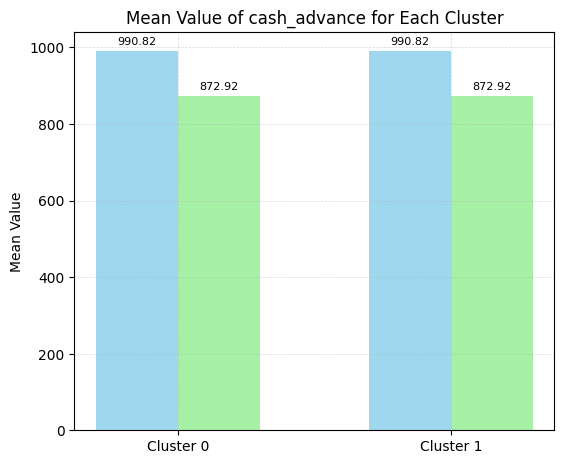

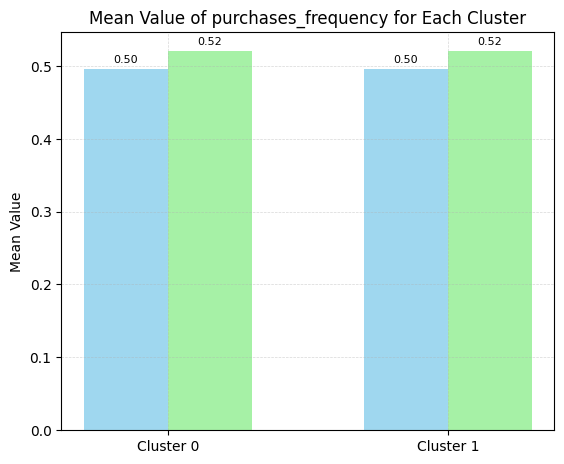

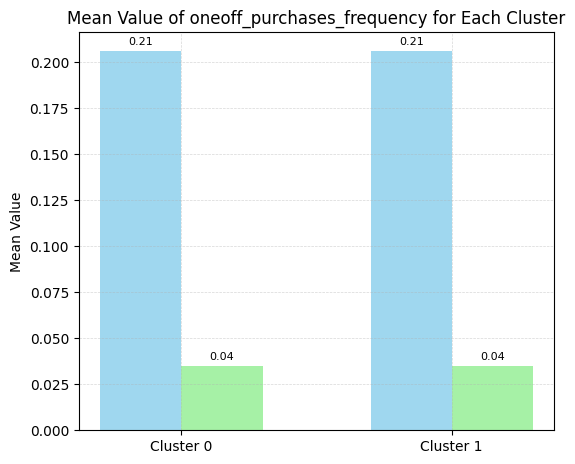

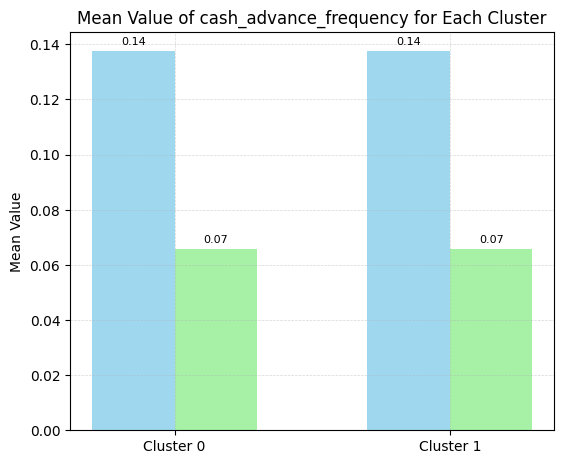

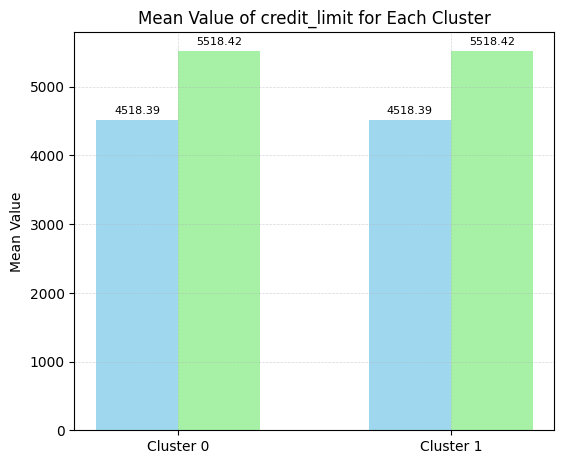

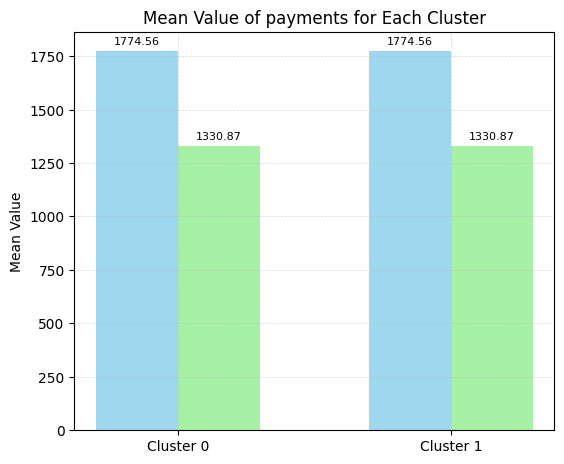

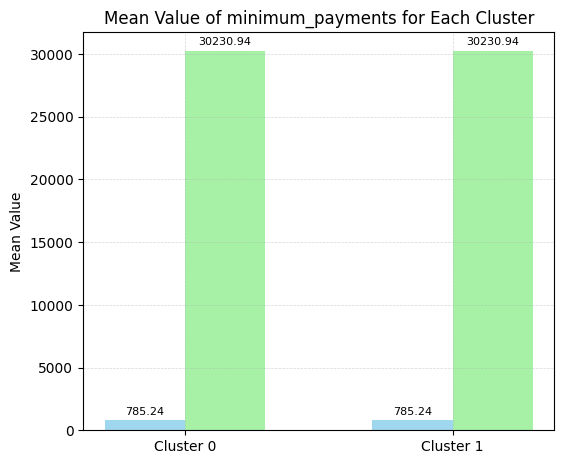

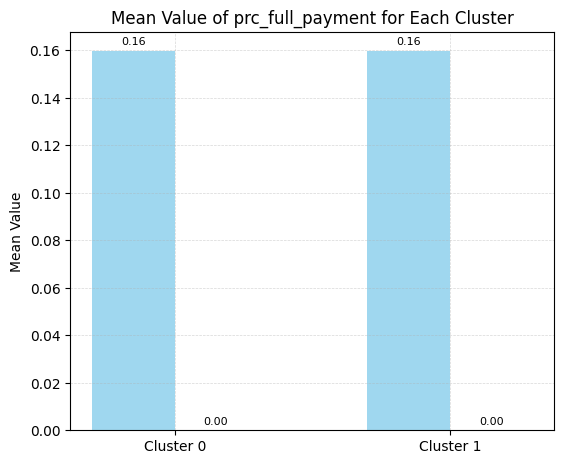

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def plot_individual_feature_comparisons(cluster_characteristics):
    # Assuming the first row is Cluster 0 and the second row is Cluster 1
    cluster_0 = cluster_characteristics.iloc[0]
    cluster_1 = cluster_characteristics.iloc[1]
    
    # Extract feature names
    features = cluster_characteristics.columns
    
    # Loop over each feature and create a separate plot
    for feature in features:
        cluster_0_val = cluster_0[feature]
        cluster_1_val = cluster_1[feature]
        
        x = np.arange(2)  # Positions for Cluster 0 and Cluster 1
        width = 0.3  # Width of the bars

        # Set up the figure and axis for each feature
        fig, ax = plt.subplots(figsize=(6, 5))  # Smaller figure size for individual plots
        bar1 = ax.bar(x - width / 2, [cluster_0_val], width, label='Cluster 0', color='skyblue', alpha=0.8)
        bar2 = ax.bar(x + width / 2, [cluster_1_val], width, label='Cluster 1', color='lightgreen', alpha=0.8)

        # Add data labels with smaller font size on top of each bar
        for rect in bar1:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', 
                        fontsize=8, color='black')  # Smaller font size

        for rect in bar2:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', 
                        fontsize=8, color='black')  # Smaller font size

        # Add labels, grid, and title for each feature
        ax.set_ylabel('Mean Value', fontsize=10)
        ax.set_title(f'Mean Value of {feature} for Each Cluster', fontsize=12)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Cluster 0', 'Cluster 1'])
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

        # Adjust layout to improve spacing
        plt.tight_layout(pad=2)  # Adjust padding to improve layout
        plt.show()

# Call the function to plot individual feature comparisons
plot_individual_feature_comparisons(cluster_characteristics)

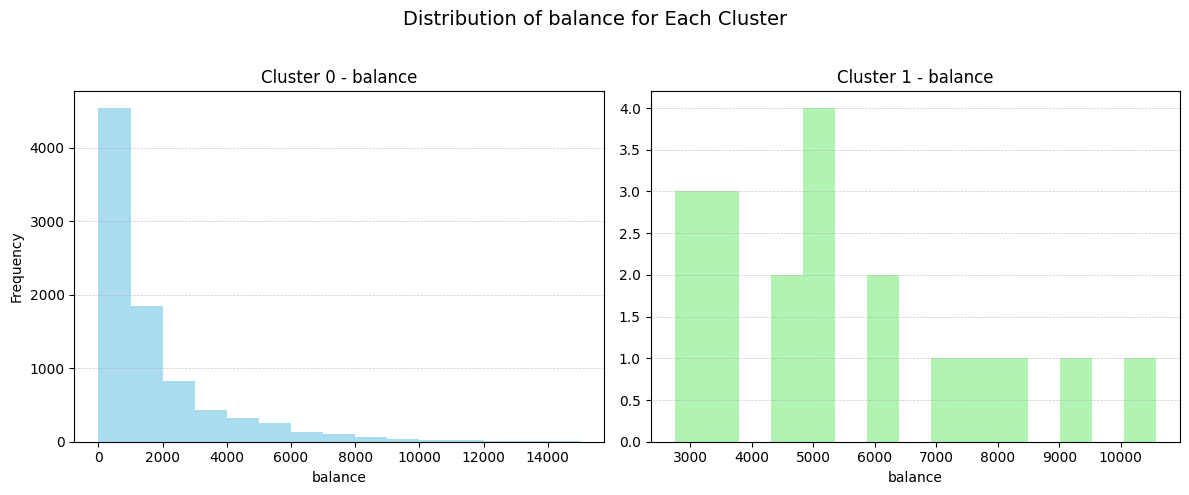

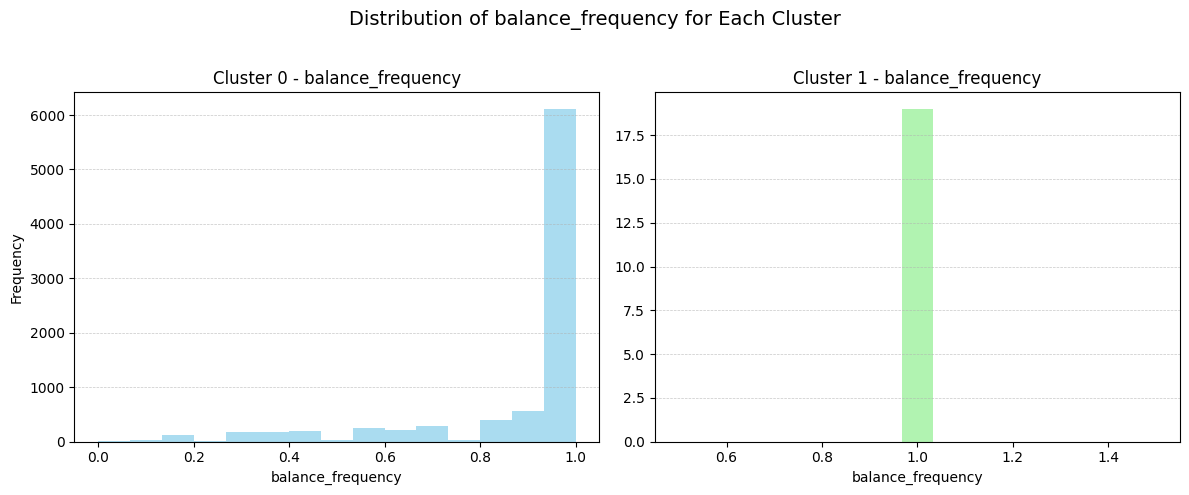

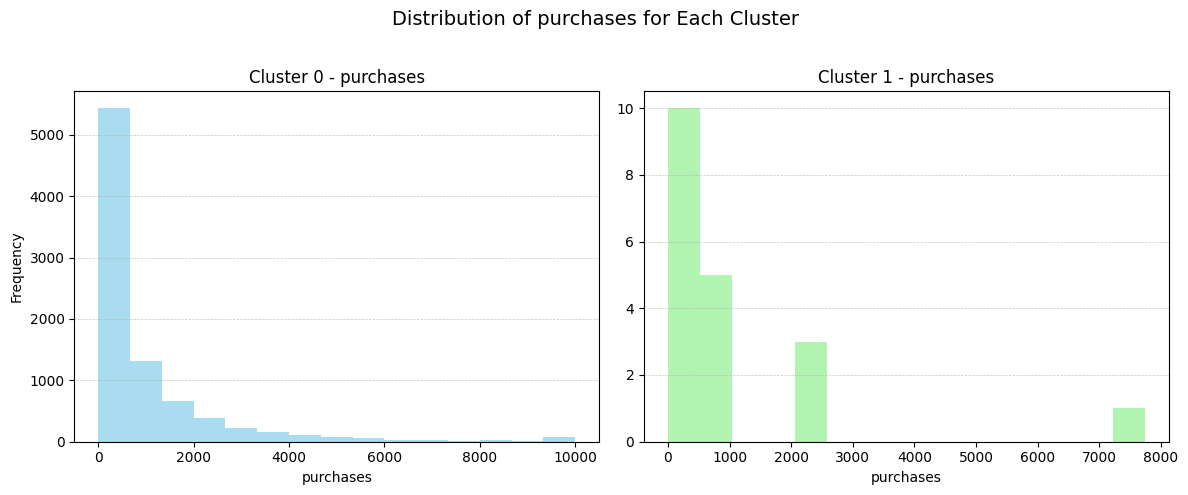

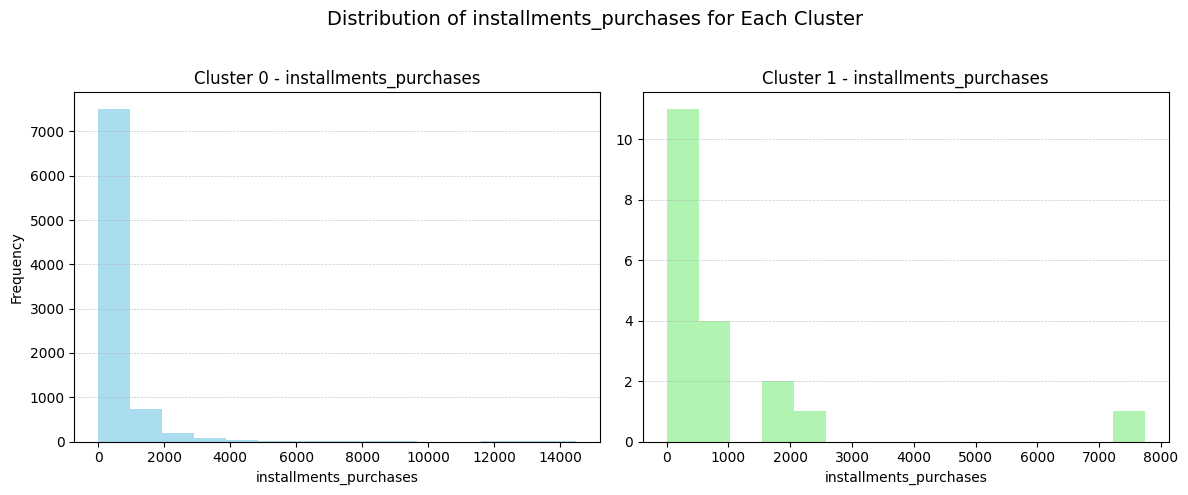

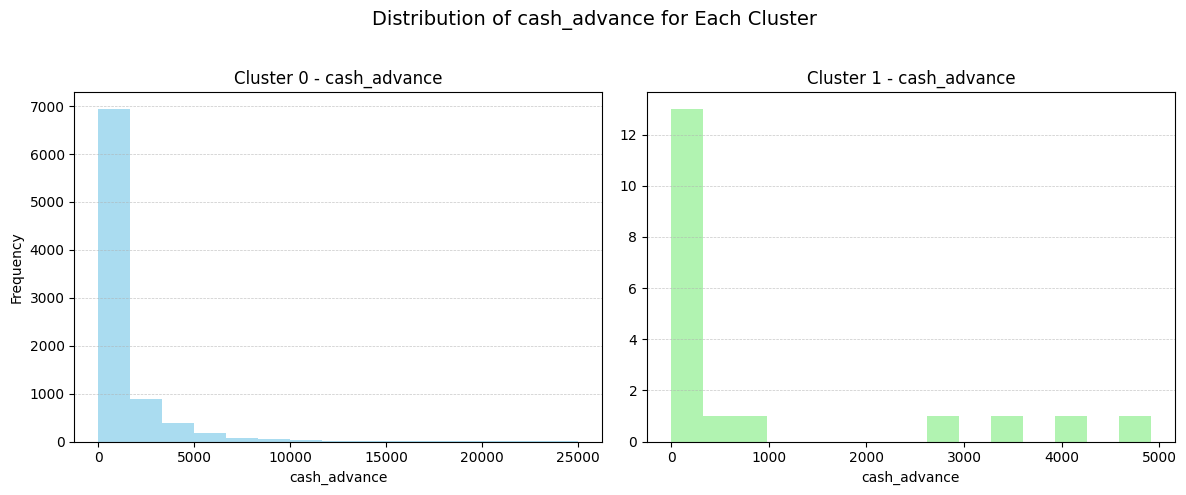

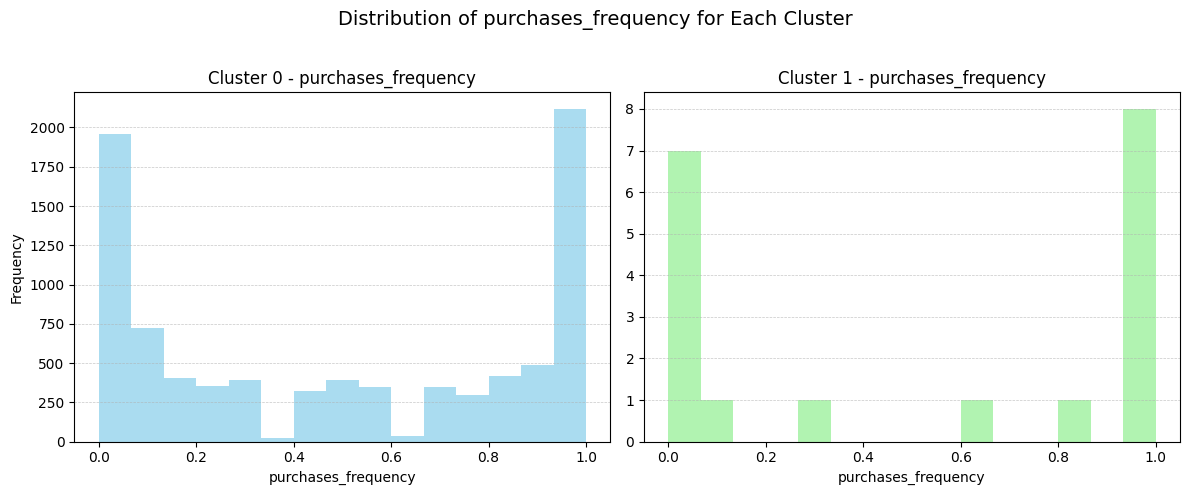

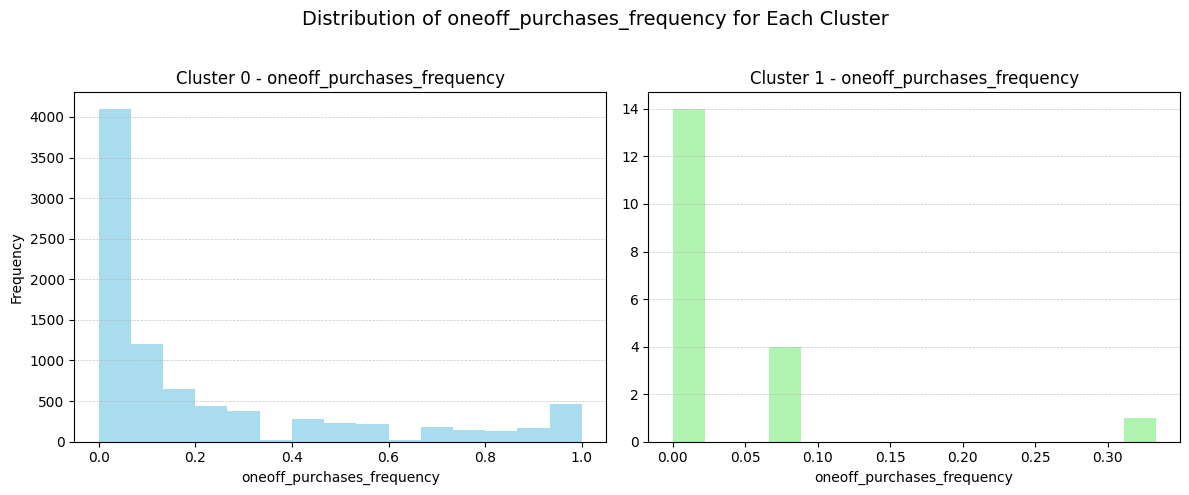

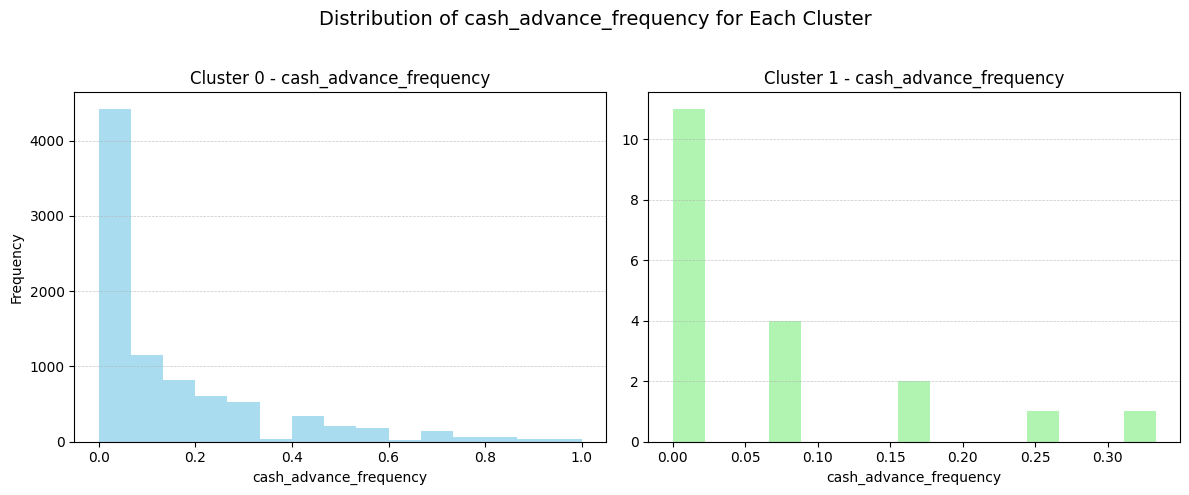

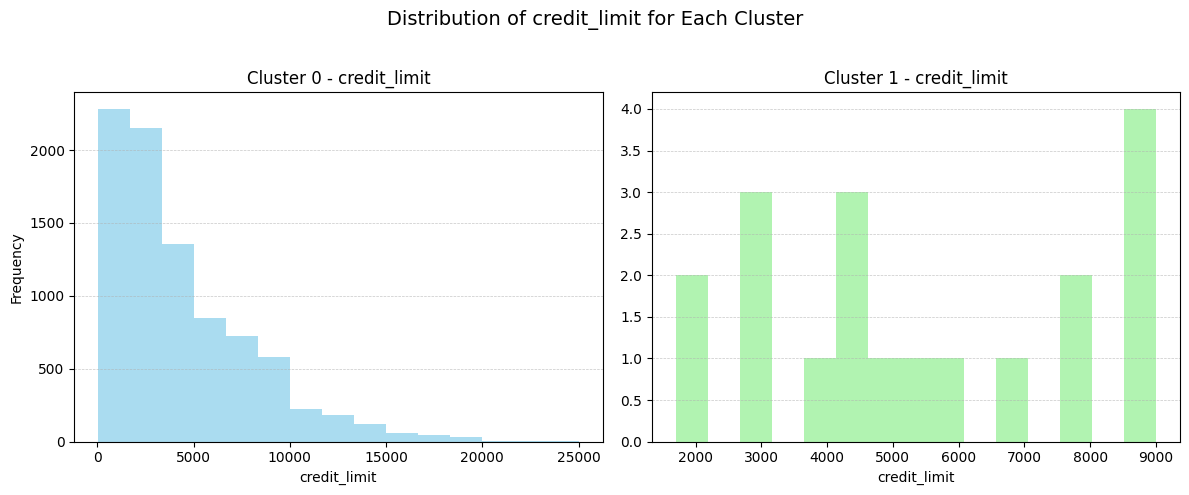

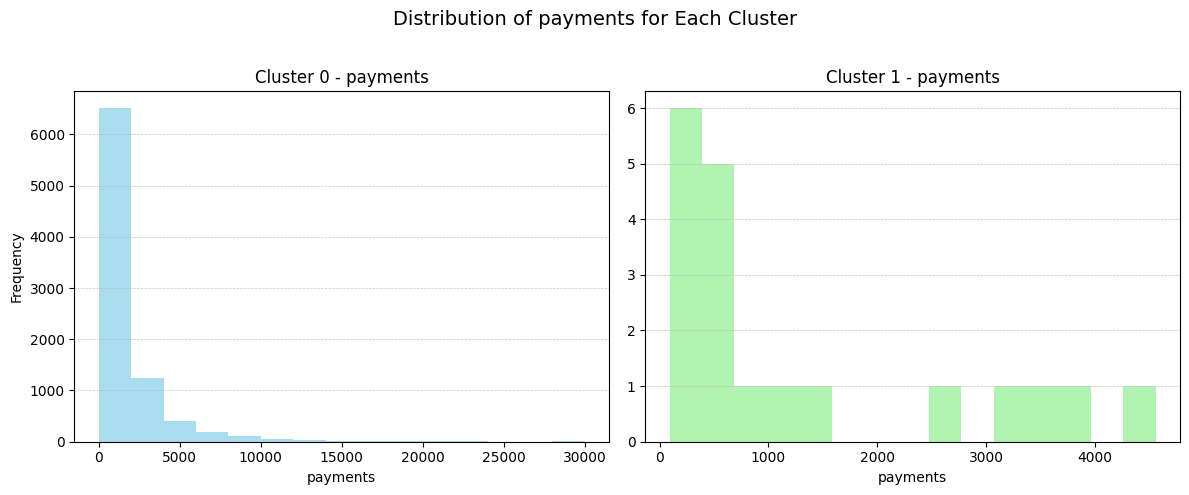

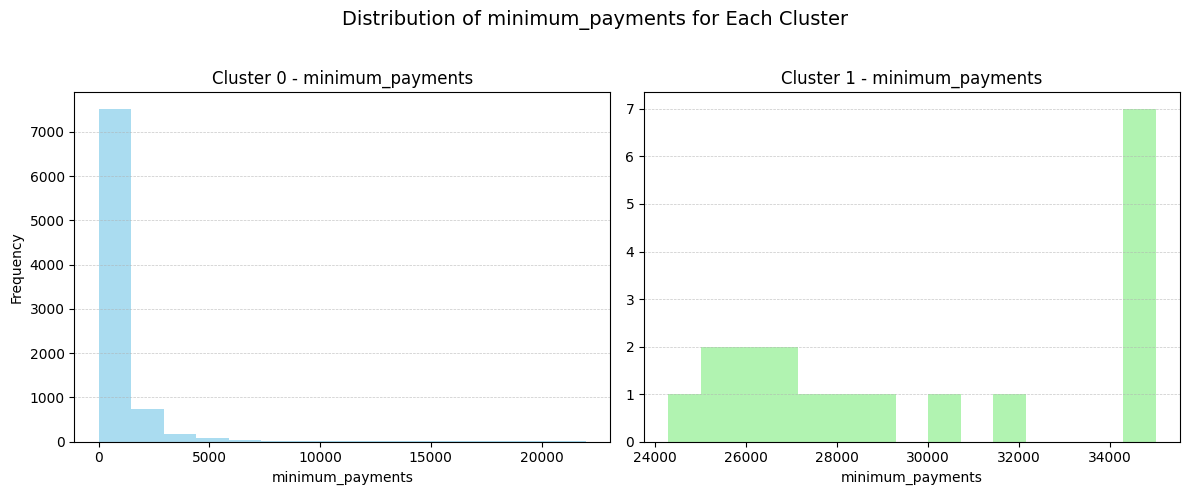

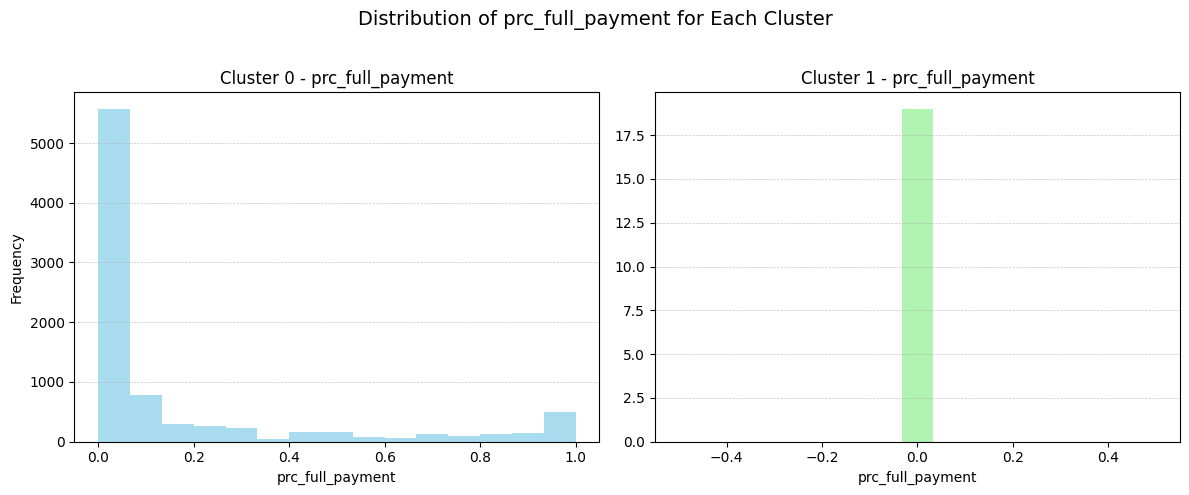

In [203]:
import matplotlib.pyplot as plt

def plot_side_by_side_feature_histograms(best_data_with_clusters):
    # Get the feature columns (exclude the 'Cluster' column)
    feature_names = best_data_with_clusters.columns.drop('Cluster')
    
    # Loop through each feature to plot side-by-side histograms
    for feature in feature_names:
        # Set up a figure with 1 row and 2 columns for side-by-side plots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Remove `sharey=True`
        
        # Plot histogram for Cluster 0
        axes[0].hist(
            best_data_with_clusters[best_data_with_clusters['Cluster'] == 0][feature],
            bins=15, alpha=0.7, color='skyblue'
        )
        axes[0].set_title(f"Cluster 0 - {feature}")
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Frequency")
        axes[0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Plot histogram for Cluster 1
        axes[1].hist(
            best_data_with_clusters[best_data_with_clusters['Cluster'] == 1][feature],
            bins=15, alpha=0.7, color='lightgreen'
        )
        axes[1].set_title(f"Cluster 1 - {feature}")
        axes[1].set_xlabel(feature)
        axes[1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Adjust layout for readability
        fig.suptitle(f"Distribution of {feature} for Each Cluster", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit the suptitle
        plt.show()

# Call the function to plot side-by-side histograms for each feature
plot_side_by_side_feature_histograms(best_data_with_clusters)

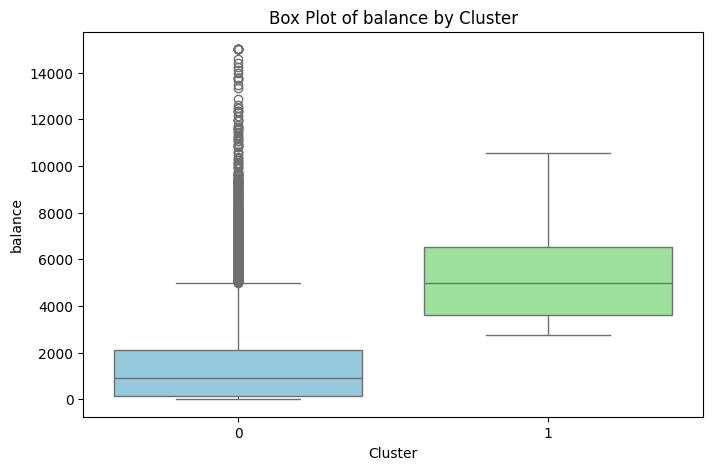

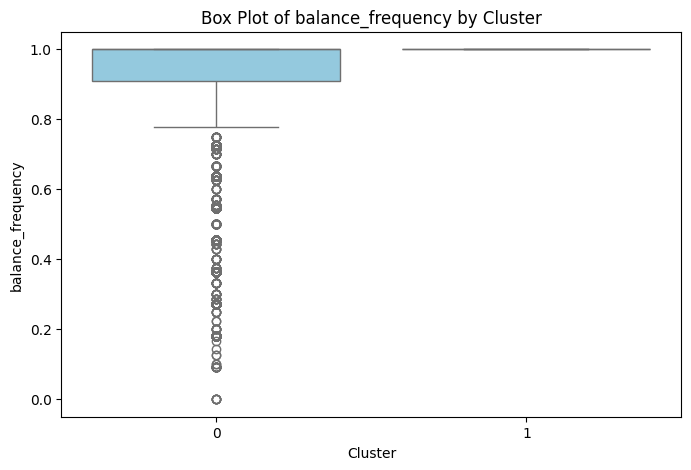

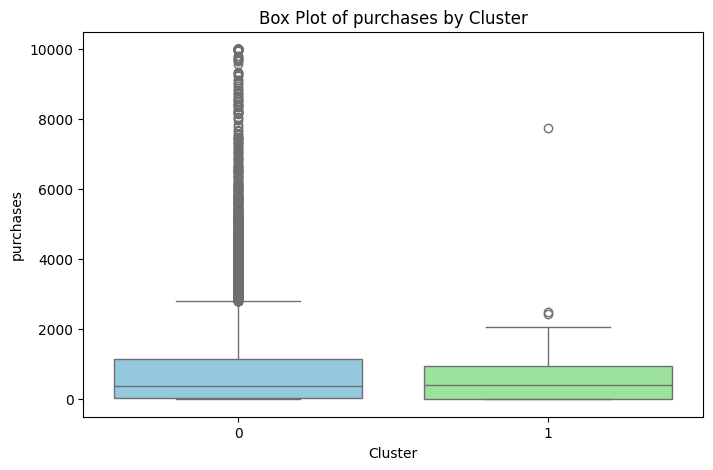

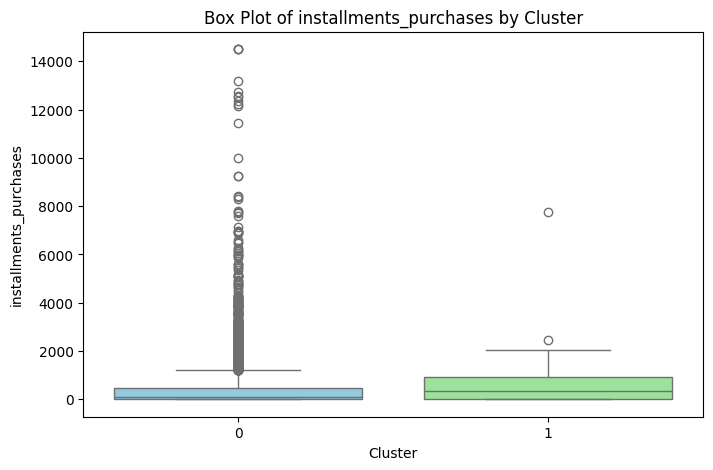

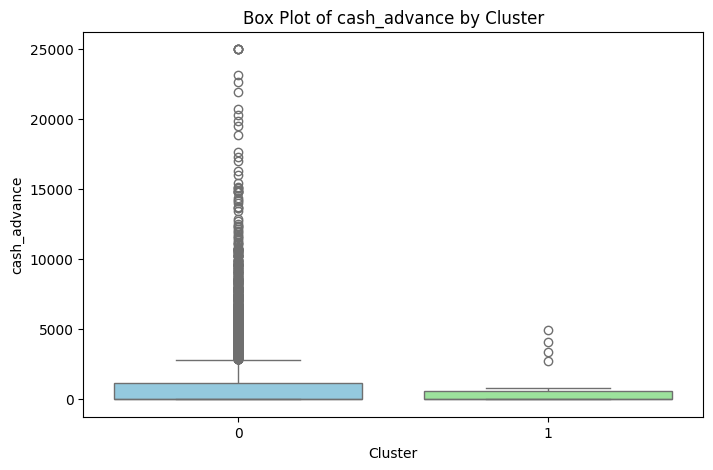

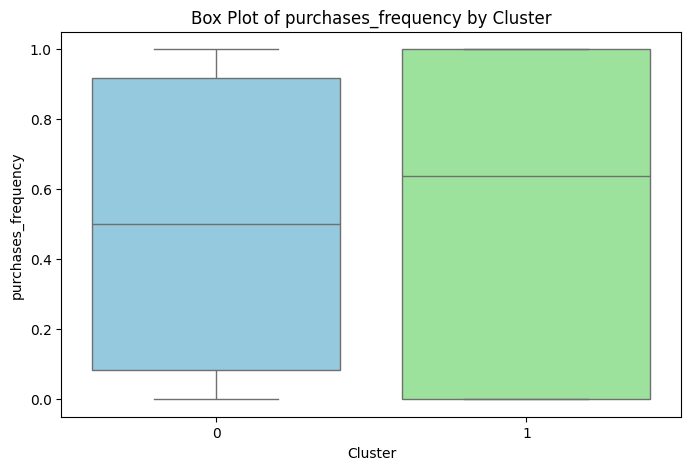

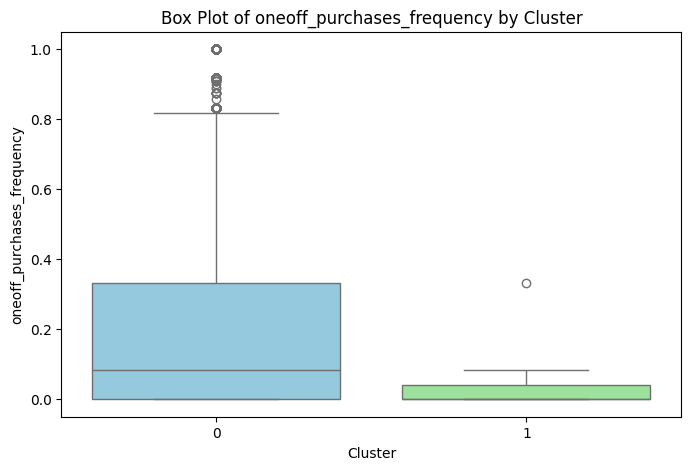

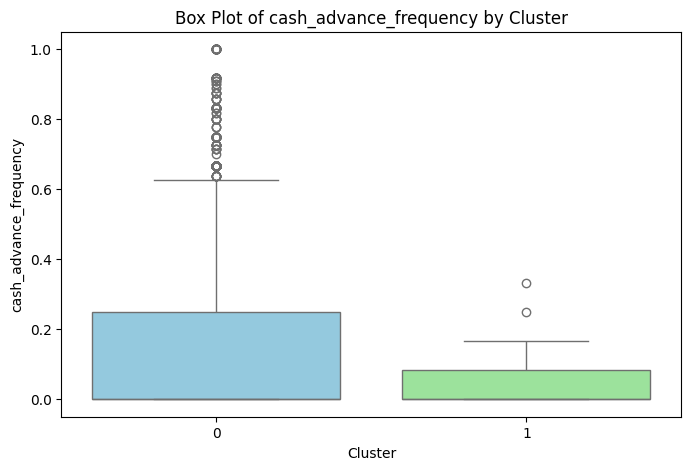

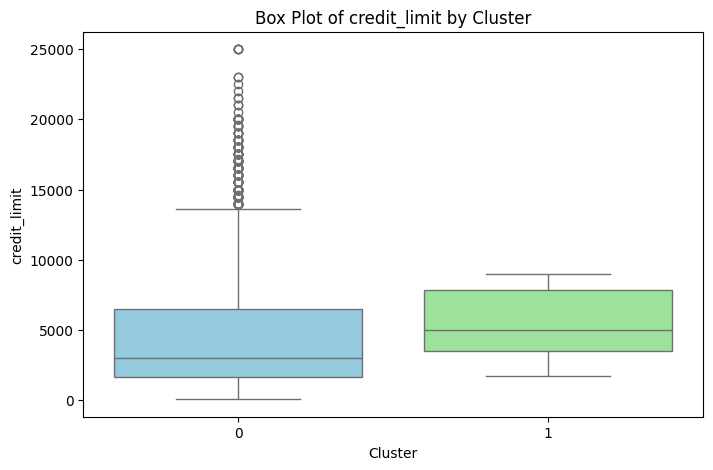

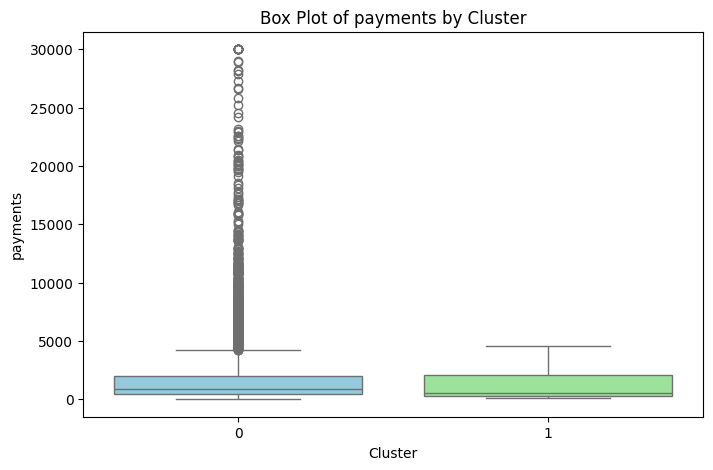

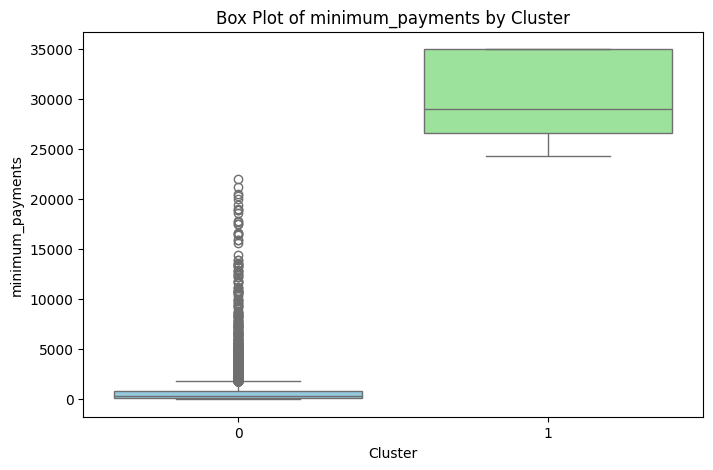

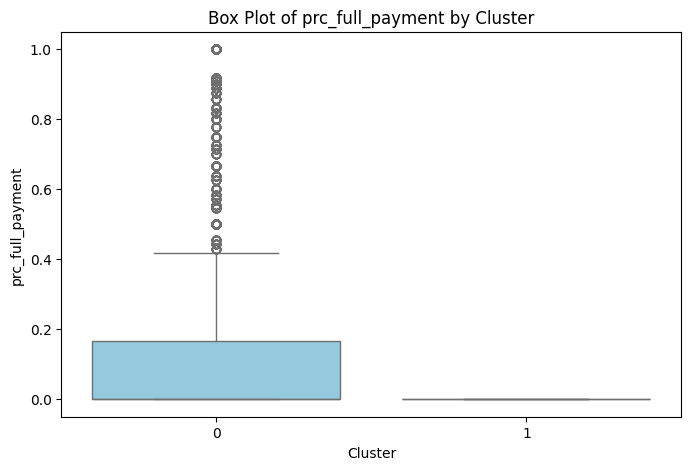

In [204]:
import seaborn as sns

def plot_boxplots(best_data_with_clusters):
    features = best_data_with_clusters.columns.drop('Cluster')
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=best_data_with_clusters, x='Cluster', y=feature, palette=["skyblue", "lightgreen"])
        plt.title(f"Box Plot of {feature} by Cluster")
        plt.xlabel("Cluster")
        plt.ylabel(feature)
        plt.show()

plot_boxplots(best_data_with_clusters)

---

## PART 5 - ACTIONABLE INSIGHTS

- Provide business recommendations based on the clusters formed. How would you target different customer segments?